# **Executive Summary**
This report outlines targeted recommendations to cut down on manual labour, the management hopes to create an intelligent system that divides people into credit score brackets.

1. **Data Quality and Integrity Improvements**
   - Address data anomalies by implementing validation rules to detect and correct negative values in critical fields.
   - Handle outliers using statistical techniques to mitigate the impact of extreme values in financial data.
   - Improve data categorization to ensure accurate insights into customer preferences.

2. **Targeted Financial Product Offerings**
   - Develop tailored financial literacy programs and credit-building products for young adults.
   - Offer investment advisory services, mortgage options, and debt consolidation plans for mid-career professionals.
   - Introduce premium banking products, wealth management, and exclusive investment opportunities for high earners.

3. **Loan and Credit Management Strategies**
   - Implement a tiered risk model for loan approvals based on debt-to-income ratio, missed payment history, and credit utilization.
   - Design flexible EMI structures for low-income groups to ensure affordability.
   - Offer debt consolidation programs to target individuals with multiple high-interest loans.

4. **Credit Score Improvement Programs**
   - Provide access to secured credit cards, low-limit credit lines, and personalized credit coaching for low-income borrowers.
   - Encourage controlled credit utilization through financial planning tools and automated repayment reminders for moderate-income borrowers.
   - Implement intensive financial counseling programs and introduce behavioral incentives for high-risk borrowers.

5. **Credit Utilization and Debt Management Solutions**
   - Encourage borrowers to maintain a credit utilization ratio below 30% to improve credit scores.
   - Identify and assist customers with utilization above 50% to prevent defaults.
   - Adjust credit limits dynamically based on spending and repayment behavior to reduce risk.

6. **Default Risk Mitigation Strategies**
   - Develop AI-driven models to detect high-risk customers based on missed payment frequency and debt-to-income ratio.
   - Offer grace periods and financial hardship programs for customers with recurring late payments.
   - Implement auto-debit features and AI-driven reminders to minimize late payments.

7. **Income-Based Financial Product Segmentation**
   - Focus on microloans, credit-building accounts, and budgeting tools for the low-income segment.
   - Offer diversified investment portfolios, moderate-risk credit options, and mortgage plans for the middle-income segment.
   - Provide luxury banking, high-yield investments, and premium financial advisory services for the high-income segment.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Background
**FinDataTech** is a fintech company providing API services to banks, fintechs, and credit bureaus. Their main product is a credit decisioning engine that uses alternative data (e.g., telco data, transaction history, and social behaviour) to generate credit scores for the underbanked population. They also aggregate data from various sources like open banking APIs and social media data to enhance their scoring models.

FinDataTech is expanding its services and has just hired you as the Head, Data Science to oversee the team building new credit scoring models, improve API integration, and lead data governance initiatives.

Your first task is to build a Credit Scoring Model Using Alternative Data. FinDataTech has been asked by a large micro-lender to provide a credit scoring system using alternative data for customers without formal banking history. The lender wants to expand into rural areas, where traditional credit data is sparse. The data to be sourced, processed includes but not limited to the following:

•	Transaction histories from mobile money wallets

•	Telco data such as airtime purchases and mobile usage patterns

•	Social media activity (e.g., Whatsapp, Facebook)

•	Past repayment behaviour (if any, think creatively on this one)

•	Demographic data (e.g., age, location, gender, profession)


### Problem Statement
You are employed by a multinational financial firm as a data scientist. The business has accumulated a great deal of credit-related data over the course of a year, along with basic bank information. To cut down on manual labour, the management hopes to create an intelligent system that divides people into credit score brackets.


In [4]:
# import the necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

# for machine learning, logging and tracking
!pip install xgboost
!pip install mlflow
!pip install uvicorn
!pip install fastapi

import joblib
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import joblib
import uvicorn
from fastapi import FastAPI
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,  classification_report, confusion_matrix
import os

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.3/28.3 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.2/648.2 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.8 MB/s eta 0:00:00


In [5]:
# Load Data
df = pd.read_csv('/content/drive/MyDrive/Datasets/credit_score.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Features Description
Based on the column names, here’s a description of each:

**ID**	--> Unique identifier for each record

**Customer_ID** -->	Unique identifier for each customer

**Month**	--> The month when the data was recorded

**Name**	--> Customer’s name (likely unnecessary for modeling)

**Age**	--> Customer’s age

**SSN**	--> Social Security Number (Sensitive data, likely unnecessary)

**Occupation**	--> Customer’s job title

**Annual_Income**	-->  Yearly earnings of the customer

**Monthly_Inhand_Salary** -->	Monthly take-home salary

**Num_Bank_Accounts** -->	Number of bank accounts held

**Num_Credit_Card**	--> Number of credit cards owned

**Interest_Rate**	--> Interest rate on loans or credit cards

**Num_of_Loan** -->	Number of active loans

**Type_of_Loan** -->	Types of loans taken by the customer

**Delay_from_due_date** -->	Average delay in days for payments

**Num_of_Delayed_Payment** -->	Number of times payments were delayed

**Changed_Credit_Limit** -->	Any changes in the credit limit

**Num_Credit_Inquiries**  -->	Number of times credit inquiries were made

**Credit_Mix**	--> The distribution of credit types held (e.g., mortgage, credit card, auto loan)

**Outstanding_Debt** -->	Unpaid debt amount

**Credit_Utilization_Ratio** -->	Ratio of credit used to available credit

**Credit_History_Age**	--> Duration of the customer’s credit history

**Payment_of_Min_Amount** -->	Whether the customer pays the minimum due amount (Yes/No)

**Total_EMI_per_month** -->	Total Equated Monthly Installments paid

**Amount_invested_monthly** -->	Investment per month by the customer

**Payment_Behaviour**	--> Patterns of how payments are made (e.g., "High Spend, Low Repayment")

**Monthly_Balance**	--> Remaining balance in accounts at month-end

**Credit_Score**	--> Credit rating label (e.g., Good, Average, Poor)

# Data Inspection
We will try to understand the dataset

In [6]:
# shape of data
df.shape

(100000, 28)

In [7]:
# columns of data
df.columns.tolist()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [8]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [9]:
# confirm duplicate records
df.duplicated().sum()

0

In [10]:
# # missing values
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


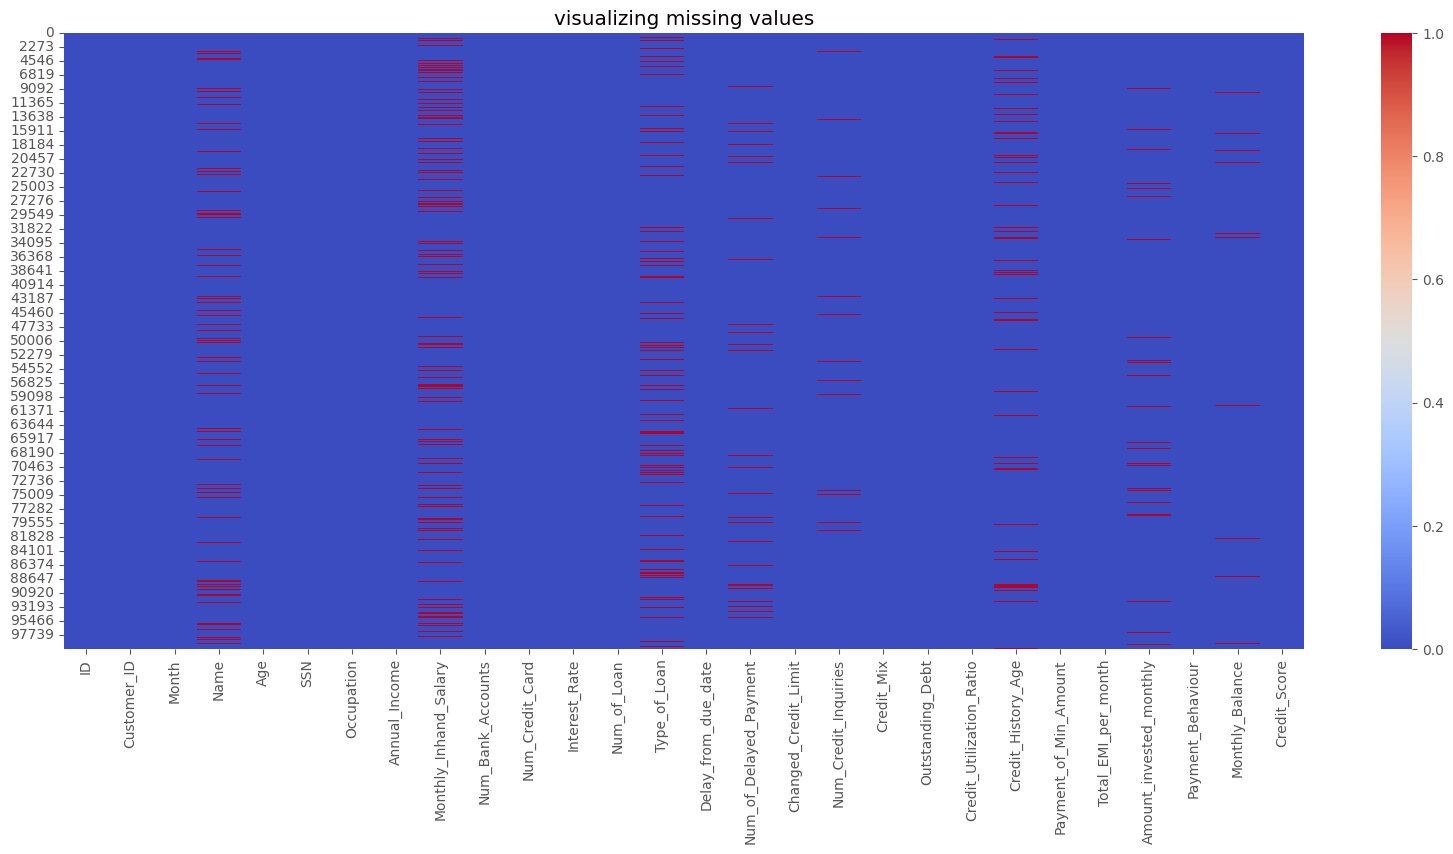

In [11]:
# visualize the missing values
plt.figure(figsize = (20, 8))
plt.title('visualizing missing values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'coolwarm')
plt.show()

In [12]:
# summary statistics of the data
df.describe().astype('int')

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998,100000,100000,100000,100000,98035,100000,100000
mean,4194,17,22,72,21,27,32,1403
std,3183,117,129,466,14,193,5,8306
min,303,-1,0,1,-5,0,20,0
25%,1625,3,4,8,10,3,28,30
50%,3093,6,5,13,18,6,32,69
75%,5957,7,7,20,28,9,36,161
max,15204,1798,1499,5797,67,2597,50,82331


In a diverse population of 100,000 individuals, the average monthly in-hand salary is `$4,194`, with a significant portion managing an average of 17 bank accounts and 22 credit cards, while facing an average delay of 21 days from due dates, leading to a credit utilization ratio of 32% and a total monthly EMI of `$1,403.`

# Data Validation and Cleaning
### Steps to cleaning and transformation
- Drop SSN column because of the sensitivity of the data to ensure data privacy of customers
- Replace special characters in all columns with nothing.

**Fix Data Types and handle null values:**
- Age should be an integer data type; replace nulls with 0.
- Annual_Income should be a float data type; replace nulls with the median.
- Num_of_Loan should be an integer data type; replace nulls with 0.
- Num_of_Delayed_Payment should be an integer data type; replace underscores with nothing and trim.
- Num_Credit_Inquiries should be converted to integer from float.
- Outstanding_Debt should be a float data type; replace underscores with nothing.
- Changed_Credit_Limit should replace underscores with null and handle nulls with the median.
- Amount_invested_monthly should be a float data type; replace extreme outliers with null and handle nulls with the median.
- Monthly_Balance should be a float data type; replace extreme outliers with null and handle nulls with the median.
- Payment_of_Min_Amount: If "NM" is present, replace it with a recognizable term or regard it as null and handle nulls accordingly.
- Credit_History_Age should be transformed into a numeric value in months (e.g., "19 Years and 5 Months" → 233 months).
- Payment_Behaviour: Replace any inconsistent values (like "!@9#%8") with null and handle nulls with the mode of the column.
- Name: Replace missing values with "Unknown".
- Credit_Mix: Replace underscores with "Unknown".
- Occupation: Replace "_______" with "Unknown".
- For columns like Credit_History_Age, handle missing values with the median.

*These steps ensure that the data is cleaned, transformed, and ready for analysis or modeling.*

In [13]:
# extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])

# confirm if there are negative for each columns
num_vars_negative = (num_vars < 0).sum()

print(num_vars_negative)

Monthly_Inhand_Salary         0
Num_Bank_Accounts            21
Num_Credit_Card               0
Interest_Rate                 0
Delay_from_due_date         591
Num_Credit_Inquiries          0
Credit_Utilization_Ratio      0
Total_EMI_per_month           0
dtype: int64


In [14]:
# select the numerical columns
num_vars = df.select_dtypes(include = ['int64', 'float64']).columns.to_list()
print(num_vars)

['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']


In [15]:
# loop through all the numerical column
for column in num_vars:
    print(df[column].value_counts())

Monthly_Inhand_Salary
6358.956667    15
6082.187500    15
6769.130000    15
2295.058333    15
3080.555000    14
               ..
1698.145919     1
1515.410833     1
1465.444744     1
1879.396612     1
2760.869167     1
Name: count, Length: 13235, dtype: int64
Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
665         1
1388        1
1429        1
1588        1
1777        1
Name: count, Length: 943, dtype: int64
Num_Credit_Card
5      18459
7      16615
6      16559
4      14030
3      13277
       ...  
551        1
426        1
784        1
673        1
599        1
Name: count, Length: 1179, dtype: int64
Interest_Rate
8       5012
5       4979
6       4721
10      4540
12      4540
        ... 
3782       1
3849       1
2206       1
4828       1
1683       1
Name: count, Length: 1750, dtype: int64
Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66 

In [16]:
# select the categorical columns
cat_vars = df.select_dtypes(include = ['category', 'object']).columns.tolist()
print(cat_vars)

['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [17]:
# loop through all the categorical column
for column in cat_vars:
    print(df[column].value_counts())

ID
0x25fb6    1
0x25fb7    1
0x25fb8    1
0x25fb9    1
0x25fba    1
          ..
0x1605     1
0x1606     1
0x1607     1
0x1608     1
0x1609     1
Name: count, Length: 100000, dtype: int64
Customer_ID
CUS_0x942c    8
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0xb891    8
             ..
CUS_0x5b48    8
CUS_0xa5f9    8
CUS_0x4d43    8
CUS_0xb95f    8
CUS_0x3edc    8
Name: count, Length: 12500, dtype: int64
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Name
Langep              44
Stevex              44
Jessicad            39
Vaughanl            39
Danielz             38
                    ..
Vellacotto           4
Josephine Masonz     4
ra Alperz            4
McBrideq             4
Timothyl             3
Name: count, Length: 10139, dtype: int64
Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
325        1
6611       1


In [18]:
# Identify the data types of each column
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [19]:
# remove SSN because of the sensitivity of the data and not required in Machine Learning
df.drop(columns='SSN', axis = 1, inplace=True)

In [20]:
# removes leading and trailing spaces from string values.
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [21]:
import re

# Remove special characters from all columns
df.replace(to_replace=r'[^\w\s.-]', value='', regex=True, inplace=True)

# Fix Data Types and handle null values
df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce').fillna(0).astype(int)
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce').fillna(0).astype(int)

df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').fillna(0).astype(int)
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce').fillna(0).astype(int)

df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].median(), inplace = True)

df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'].replace('_', np.nan), errors='coerce')
df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median(), inplace=True)

df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df.loc[df['Amount_invested_monthly'] > 1e6, 'Amount_invested_monthly'] = np.nan  # Remove extreme outliers
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median(), inplace=True)

df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(), inplace = True)

df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', np.nan).fillna('Unknown')

df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].median())

df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())

# Convert Credit History Age to Months
def convert_credit_history_age(text):
    match = re.search(r'(\d+)\sYears?\sand\s(\d+)\sMonths?', str(text))
    if match:
        return int(match.group(1)) * 12 + int(match.group(2))
    return np.nan

df['Credit_History_Age'] = df['Credit_History_Age'].astype(str).apply(convert_credit_history_age)

# replace inconsistent value in 'Payment_Behaviour'
mode_payment_behaviour = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('98', mode_payment_behaviour)

# Replace missing values in Name with "Unknown"
df['Name'] = df['Name'].fillna('Unknown')

# replace _ in Credit Mix with 'Unknown'
df['Credit_Mix'] = df['Credit_Mix'].replace('_', 'Unknown')

# replace _______ in occupation with 'Unknown'
df['Occupation'] = df['Occupation'].str.replace('_______', 'Unknown')

# Fill NaN with the median
median_value = df['Credit_History_Age'].median()
df['Credit_History_Age'].fillna(median_value, inplace=True)

In [22]:
# loop through all the numerical column
for column in num_vars:
    print(df[column].value_counts())

Monthly_Inhand_Salary
3093.745000    15009
6082.187500       15
6769.130000       15
6358.956667       15
2295.058333       15
               ...  
5081.452604        1
6128.120990        1
2539.071951        1
2073.414167        1
7821.986249        1
Name: count, Length: 13235, dtype: int64
Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
665         1
1388        1
1429        1
1588        1
1777        1
Name: count, Length: 943, dtype: int64
Num_Credit_Card
5      18459
7      16615
6      16559
4      14030
3      13277
       ...  
551        1
426        1
784        1
673        1
599        1
Name: count, Length: 1179, dtype: int64
Interest_Rate
8       5012
5       4979
6       4721
10      4540
12      4540
        ... 
3782       1
3849       1
2206       1
4828       1
1683       1
Name: count, Length: 1750, dtype: int64
Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4     

In [23]:
# print few rows
print(df.head())

       ID Customer_ID     Month           Name  Age Occupation  Annual_Income  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  Scientist       19114.12   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  Scientist       19114.12   
2  0x1604   CUS_0xd40     March  Aaron Maashoh -500  Scientist       19114.12   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  Scientist       19114.12   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  Scientist       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  ...  Credit_Mix  \
0            1824.843333                  3                4  ...     Unknown   
1            3093.745000                  3                4  ...        Good   
2            3093.745000                  3                4  ...        Good   
3            3093.745000                  3                4  ...        Good   
4            1824.843333                  3                4  ...        Good   

   Outstanding_Debt Credit

In [24]:
# see the statistical summary of the data
df.describe().astype('int')

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
mean,105,168735,4029,17,22,72,2,21,28,10,27,1423,32,220,1403,189,401
std,672,1392074,2961,117,129,466,60,14,215,6,191,1149,5,95,8306,191,212
min,-500,7005,303,-1,0,1,-100,-5,-3,-6,0,0,20,1,0,0,0
25%,23,20062,1792,3,4,8,1,10,7,5,3,571,28,154,30,77,270
50%,32,37550,3093,6,5,13,3,18,13,9,5,1166,32,219,69,128,336
75%,42,70064,5371,7,7,20,5,28,18,14,9,1933,36,292,161,220,467
max,8698,24198062,15204,1798,1499,5797,1496,67,4397,36,2597,4998,50,404,82331,1977,1602


**Observations**

Outliers: The maximum values in several columns (e.g., Annual_Income and Monthly_Balance) suggest the presence of outliers.

Negative Values: Some columns like Age, Num_Bank_Accounts, and Num_of_Loan contain negative values, which may need to be addressed during data cleaning.

Distribution: The standard deviations indicate variability, especially in Annual_Income, which has a high standard deviation compared to its mean.

This summary can help identify potential issues in the dataset and guide further preprocessing steps.

In [25]:
# Convert columns to numeric and replace negative values with NaN
cols_to_fix = ['Age', 'Num_Bank_Accounts', 'Num_of_Loan']

for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
    df.loc[df[col] < 0, col] = np.nan  # Replace negative values with NaN
    df[col] = df[col].fillna(df[col].median()).astype(int)  # Fill NaN with median

In [26]:
# see the statistical summary of the data
df.describe().astype('int')

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
mean,110,168735,4029,17,22,72,6,21,28,10,27,1423,32,220,1403,189,401
std,670,1392074,2961,117,129,466,57,14,215,6,191,1149,5,95,8306,191,212
min,0,7005,303,0,0,1,0,-5,-3,-6,0,0,20,1,0,0,0
25%,23,20062,1792,3,4,8,1,10,7,5,3,571,28,154,30,77,270
50%,32,37550,3093,6,5,13,3,18,13,9,5,1166,32,219,69,128,336
75%,42,70064,5371,7,7,20,5,28,18,14,9,1933,36,292,161,220,467
max,8698,24198062,15204,1798,1499,5797,1496,67,4397,36,2597,4998,50,404,82331,1977,1602


In [27]:
# Handle Outliers using IQR (Replace outliers with median)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].copy()  # Avoid modifying original DataFrame structure
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = df[column].median()  # Replace outliers with median
    return df

# Apply IQR method to relevant columns
for col in ['Age', 'Annual_Income', 'Monthly_Inhand_Salary']:
    df = remove_outliers_iqr(df, col)

In [28]:
# Replace the null values in Type_of_Loan with its mode
loan_type_mode_value = df['Type_of_Loan'].mode()[0]
df['Type_of_Loan'] = df['Type_of_Loan'].fillna(loan_type_mode_value).astype(str)

# Exploratory Data Analysis And Visualization

###  Basic Data Understanding
Before diving into visuals, start with basic EDA summary statistics.

**General Overview**

In [29]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Basic Info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


Dataset Shape: (100000, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     100000 non-null  float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  int64  
 12  Type_of_Loan              100000 non-null  object 
 13  Delay_from_due_da

### Univariate Analysis (Distribution of Each Feature)
This helps understand the spread, skewness, and potential outliers.

**Distribution of Age, Annual Income & Monthly Salary**

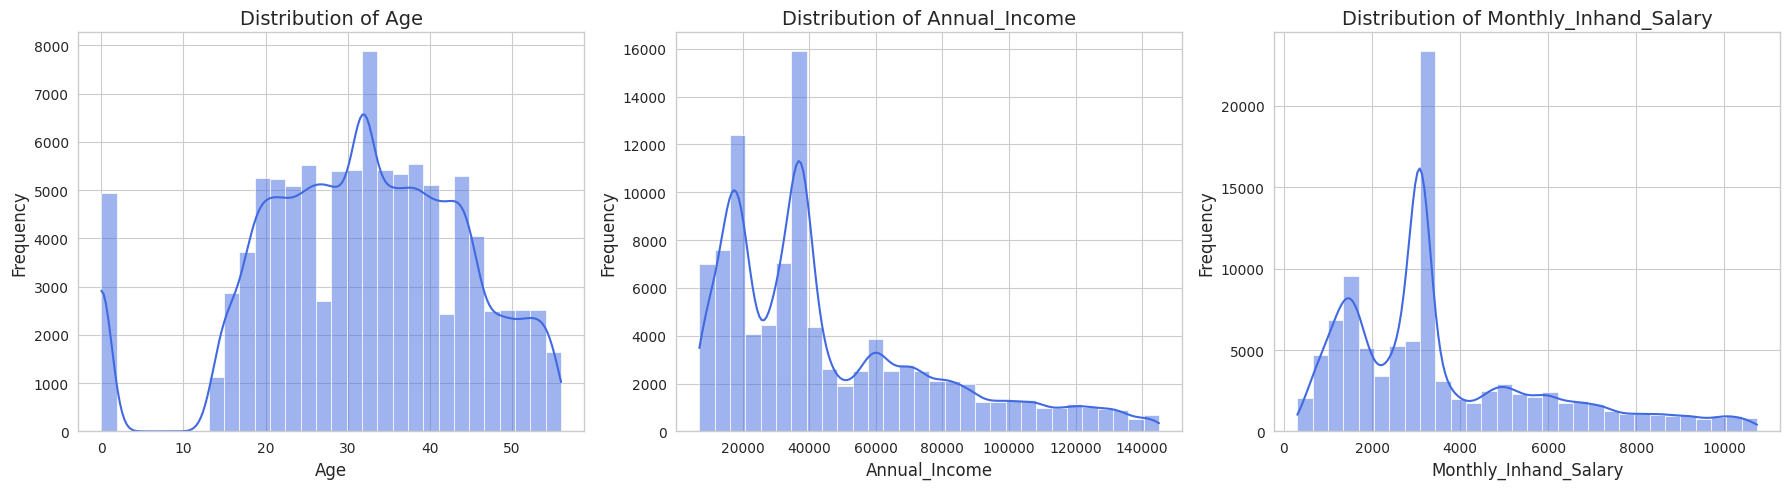

In [30]:
# Customize plot aesthetics
sns.set_style("whitegrid")

# Define features for distribution analysis
features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i], color='royalblue')
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Age Distribution**
- The majority of customers are between 20 and 50 years old, making them the primary demographic.
- The peak at age 30 suggests that this age group could be a key focus for financial products.
- If very young ages (close to 0) are found in the dataset, they should be checked for anomalies.

**Annual Income Distribution**
- Since most people earn between `$20,000` and `$40,000`, financial services should target this income group with suitable products like savings plans, low-risk investments, or credit-building options.
- The long tail suggests a small group of high earners, who may need premium banking services or investment management.
- Higher income levels above $100,000 are much less frequent. The skewness suggests that financial services should be tailored based on income segments, ensuring affordability and relevance.


**Monthly Inhand Salary Distribution**
- Since the majority earn between `$2,000 and $4,000` per month, financial offerings should be customized for this range, such as affordable loan repayment plans. A smaller group earns significantly higher monthly salaries above `$10,000`.
- The presence of higher earners suggests an opportunity for premium banking products or investment services.
- Outliers with very high salaries should be examined separately to determine their financial behavior and risk profiles.

### Bivariate Analysis (Feature Relationships & Correlations)
**Correlation Heatmap**

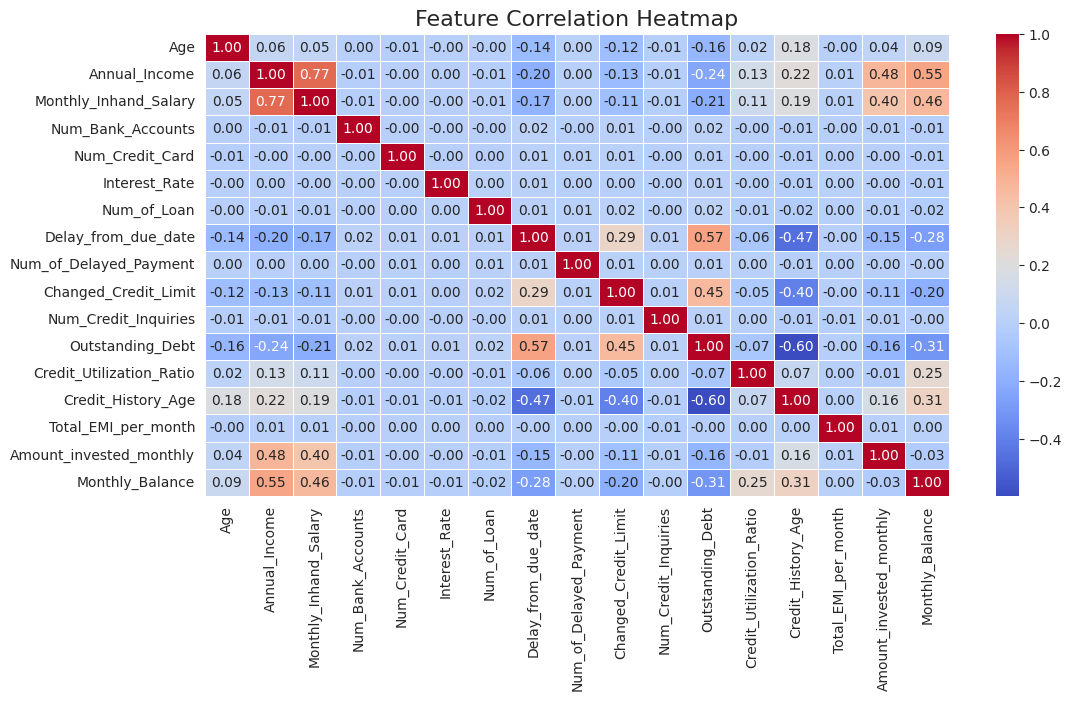

In [31]:
# Compute correlation matrix
numerical_columns = df.select_dtypes(include = ['int', 'float'])
corr_matrix = numerical_columns.corr()

# Heatmap visualization
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


**High Positive Correlations**
- Annual_Income ↔ Monthly_Inhand_Salary (0.77) → Expected, as higher annual income results in higher monthly salary.
- Outstanding_Debt ↔ Delay_from_due_date (0.57) → Customers with high outstanding debt tend to delay payments more.
- Monthly_Balance ↔ Annual_Income (0.55) → Higher income results in a higher monthly balance.

**Moderate Correlations**
- Changed_Credit_Limit ↔ Delay_from_due_date (0.45) → Customers who delayed payments may have had their credit limits changed.
- Amount_invested_monthly ↔ Annual_Income (0.48) → Higher income leads to higher investment amounts.

**Negative Correlations (Risk Factors)**
- Outstanding_Debt ↔ Credit_History_Age (-0.60) → People with longer credit history tend to have lower outstanding debt.
- Credit_Utilization_Ratio ↔ Outstanding_Debt (-0.07) → Higher outstanding debt is associated with lower credit utilization.
- Delay_from_due_date ↔ Credit_History_Age (-0.47) → Customers with longer credit history are less likely to delay payments.

**Relationship Between Income and Loan Amount**

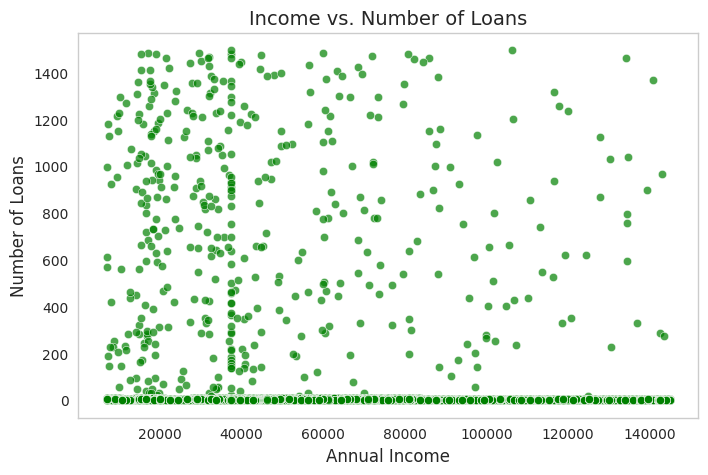

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual_Income'], y=df['Num_of_Loan'], alpha=0.7, color='green')
plt.title('Income vs. Number of Loans', fontsize=14)
plt.xlabel('Annual Income')
plt.ylabel('Number of Loans')
plt.grid()
plt.show()


Most Individuals Have 0 or Very Few Loans

A significant portion of the data points is clustered along the bottom (y = 0), meaning many individuals have no loans at all.
This suggests that a large proportion of the population is either debt-free or has very few loans.
High Loan Counts are Concentrated at Lower Incomes (Below `$40,000`)

There is a dense cluster of individuals earning `$20,000 - $40,000` per year who have a high number of loans (hundreds to thousands).
This suggests that lower-income individuals rely more on multiple loans, possibly due to financial constraints.
Higher Incomes (Above $60,000) Show More Moderate Loan Counts

As income increases, the number of loans generally remains low, with fewer cases of extreme borrowing.
This could imply that higher-income individuals are either more financially stable or have better access to structured financing options.
Outliers with Extremely High Loan Counts Exist

Some individuals have over 1,000 loans, which is highly unusual.
These might be data anomalies, cases of microloans, or individuals engaged in financial schemes.

**Credit Inquiries vs. Default Risk**

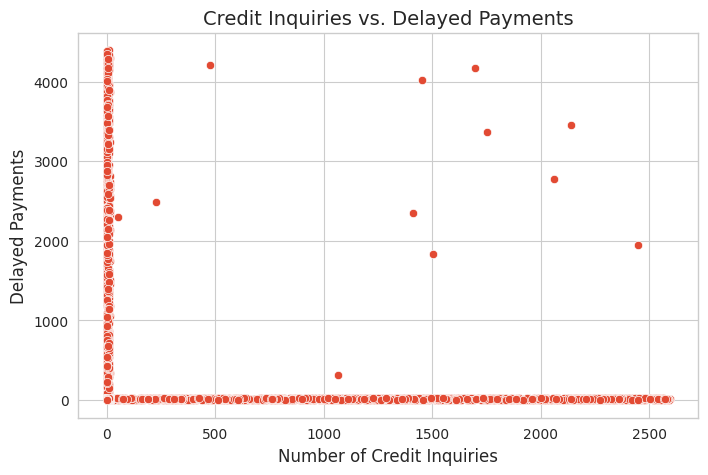

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Num_Credit_Inquiries'], y=df['Num_of_Delayed_Payment'], palette="coolwarm")
plt.title("Credit Inquiries vs. Delayed Payments", fontsize=14)
plt.xlabel("Number of Credit Inquiries")
plt.ylabel("Delayed Payments")
plt.show()


**Observing the Data Distribution**
Most data points are concentrated near (0,0), indicating that the majority of borrowers have few credit inquiries and very few delayed payments.
A few outliers have very high delayed payments and a large number of credit inquiries, but they are not common. There is a vertical cluster around low credit inquiries (0-50), meaning many individuals with few inquiries still have high delayed payments.

**Key Insights**
- High Credit Inquiries ≠ More Delayed Payments: Borrowers with many credit inquiries are not always the ones with high delayed payments. Some with very high credit inquiries (1000+) still have low delayed payments.
- Borrowers with Few Inquiries Can Still Have High Delayed Payments: A significant number of borrowers with 0–50 inquiries have large delayed payments (>1000 days late).
This indicates that factors other than credit inquiries (e.g., income level, debt-to-income ratio, financial stability) may contribute to delayed payments.

###  Categorical Variables Analysis

**Loan Type Distribution**

In [34]:
# Top 10 loan type distribution
count_loan_type = df['Type_of_Loan'].value_counts()[:10]
print(count_loan_type)

Type_of_Loan
Not Specified                     12816
Credit-Builder Loan                1280
Personal Loan                      1272
Debt Consolidation Loan            1264
Student Loan                       1240
Payday Loan                        1200
Mortgage Loan                      1176
Auto Loan                          1152
Home Equity Loan                   1136
Personal Loan and Student Loan      320
Name: count, dtype: int64


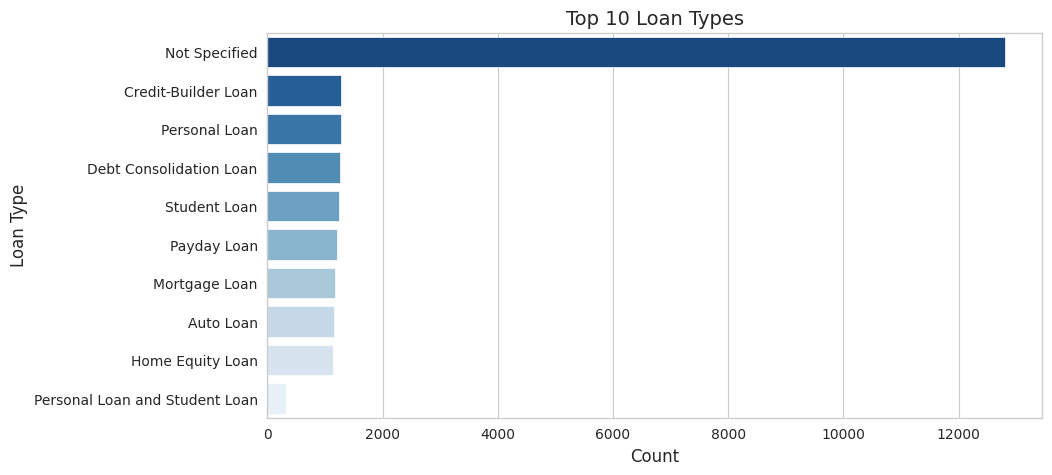

In [35]:
# Create a count plot for the top 10 loan types
plt.figure(figsize=(10, 5))
sns.barplot(x=count_loan_type.values, y=count_loan_type.index, palette= "Blues_r")

# Adding titles and labels
plt.title("Top 10 Loan Types", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Loan Type")

# Display the plot
plt.show()

- The most common loan type is "Not Specified" with a count of 1408, suggesting a significant number of loans were not categorized properly or missing data exists.
- Credit-Builder Loans and Personal Loans are the next most popular loan types with a count of 1280, and 1272, respectively, indicating a demand for loans aimed at improving credit scores and general financial needs.
- Debt Consolidation Loans, Student Loans, and Payday Loans also have high counts, reflecting financial trends where individuals take loans for debt management, education, or short-term financial relief.
- Home Equity Loans and Auto Loans appear in lower ranks but still show demand, likely tied to long-term financial investments and vehicle purchases.
- The least common loan type in this list is "Personal Loan and Student Loan" with a count of 320, possibly a specialized category or a combined loan type.

###  Outlier Detection
**Boxplots to Detect Outliers**

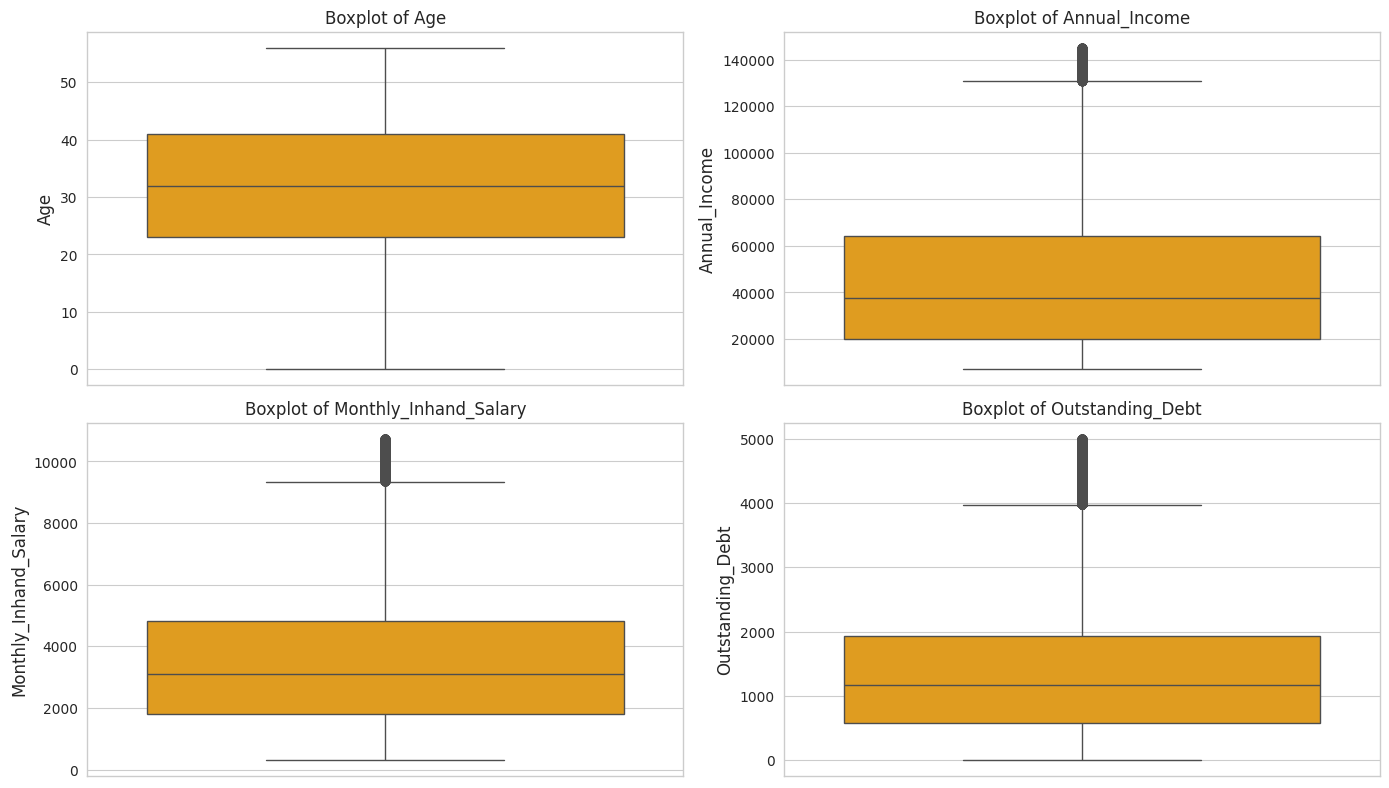

In [36]:
features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature], color="orange")
    plt.title(f"Boxplot of {feature}", fontsize=12)

plt.tight_layout()
plt.show()

Age Distribution: The median age of loan applicants is between `30-35 years`, with an interquartile range (IQR) from 20 to 45 years. This indicates that most applicants are in their prime borrowing years. However, extreme outliers, including very young applicants, suggest potential data entry errors.

Annual Income Distribution: The median annual income hovers around `$40,000–$50,000`, with an IQR from `$20,000 to $80,000`. Many applicants earn below `$50,000`, which could impact loan repayment capabilities. High-income outliers above `$120,000` may require tailored financial products.

Monthly In-Hand Salary: The median in-hand salary is roughly `$2,500–$3,500` per month, with an IQR from `$1,500 to $5,000`. High earners exceeding `$10,000` indicate a need for careful assessment of debt-to-income ratios during loan approvals.

Outstanding Debt Distribution: Median outstanding debt is around `$1,500–$2,00`0, with some individuals facing debts over `$4,500–$5,000`. Applicants with high debt levels may be considered high-risk, suggesting the necessity for a risk-based interest rate model.

## Hypothesis Testing
Why? Helps validate key business assumptions using statistical tests.

**Hypothesis 1: Does Annual Income Differ Based on Loan Default?**

Null Hypothesis (H₀): There is no significant difference in Annual_Income between defaulters and non-defaulters.

Alternative Hypothesis (H₁): There is a significant difference.

*We use t-test to check for significant differences in income.*

In [37]:
from scipy.stats import ttest_ind

# Create two groups: defaulters vs. non-defaulters
default_group = df[df['Num_of_Delayed_Payment'] > 0]['Annual_Income']
non_default_group = df[df['Num_of_Delayed_Payment'] == 0]['Annual_Income']

# Perform t-test
t_stat, p_value = ttest_ind(default_group, non_default_group, nan_policy='omit')

print(f"T-Statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

T-Statistic: -5.871, P-value: 0.000


In [38]:
# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis: Annual Income differs between defaulters and non-defaulters.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in Annual Income.")


Reject Null Hypothesis: Annual Income differs between defaulters and non-defaulters.


p < 0.05, this implies that income significantly impacts loan defaults.

**Hypothesis 2: Is There a Relationship Between Age and Loan Defaults?**

Chi-Square Test for Independence

In [39]:
from scipy.stats import chi2_contingency

# Create a crosstab
contingency_table = pd.crosstab(df['Age'], df['Num_of_Delayed_Payment'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.3f}, P-value: {p_value:.3f}")

Chi-Square Statistic: 37023.147, P-value: 0.000


In [40]:
if p_value < 0.05:
    print("Reject Null Hypothesis: Age and Loan Defaults are dependent.")
else:
    print("Fail to Reject Null Hypothesis: No strong relationship between Age and Loan Defaults.")

Reject Null Hypothesis: Age and Loan Defaults are dependent.


p<0.05, it implies that age plays a significant role in financial stability.

### Income vs. Categorical Credit Score Analysis
**Checking the Distribution of Income Across Credit Score Categories**

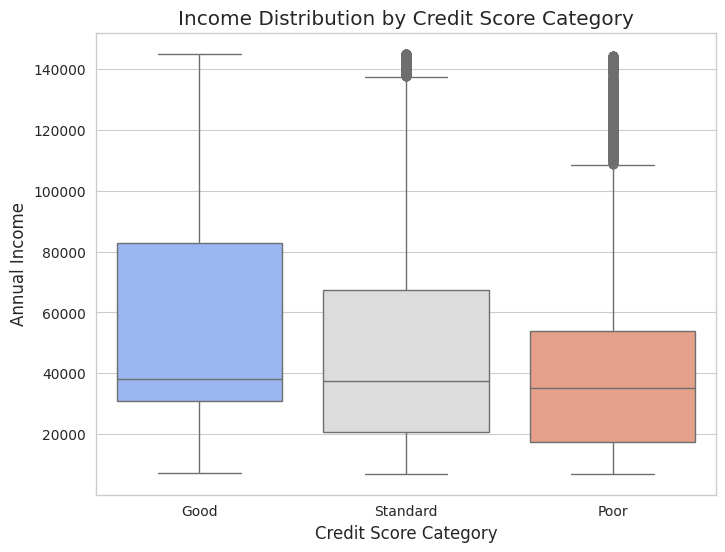

In [41]:
# Boxplot to show distribution of income by credit score categories
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Credit_Score'], y=df['Annual_Income'], palette='coolwarm')
plt.title('Income Distribution by Credit Score Category')
plt.xlabel('Credit Score Category')
plt.ylabel('Annual Income')
plt.show()

Individuals with "Good" Credit Scores Tend to Have Higher Incomes

The median income for the "Good" credit score category is higher than the other two groups.
The IQR is also larger, meaning there's a wider spread of incomes among those with good credit.
"Standard" Credit Score Category Has a Balanced Distribution

The median income is lower than the "Good" category but higher than the "Poor" category.
There are outliers on the higher end, indicating some high-income individuals still fall into this group.
"Poor" Credit Score Category Has the Lowest Median Income

The median income is significantly lower than the other two groups.
There is a cluster of high-income outliers, but the bulk of individuals in this group earn less.

**Proportion of Credit Score Categories in Each Income Bracket**

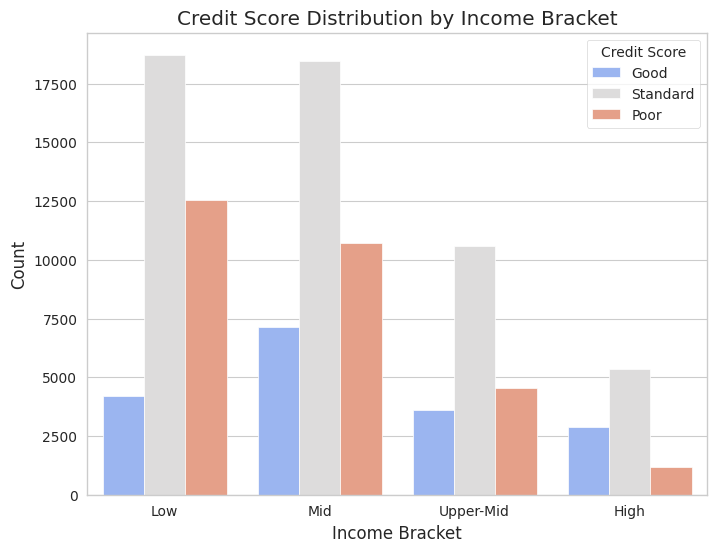

In [42]:
# Creating income brackets
df['Income_Bracket'] = pd.cut(df['Annual_Income'], bins=[0, 30000, 60000, 100000, float('inf')],
                              labels=['Low', 'Mid', 'Upper-Mid', 'High'])

# Countplot to visualize distribution
plt.figure(figsize=(8,6))
sns.countplot(x=df['Income_Bracket'], hue=df['Credit_Score'], palette='coolwarm')
plt.title('Credit Score Distribution by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.legend(title="Credit Score")
plt.show()


Most Individuals in Low and Mid-Income Brackets Have "Standard" or "Poor" Credit Scores

The majority of people in the Low and Mid-income groups fall into the "Standard" and "Poor" credit score categories.
Very few people in these income brackets have a "Good" credit score.
Higher Income Brackets Have More Individuals with Good Credit Scores

In the Upper-Mid and High-income brackets, the number of individuals with "Good" credit scores increases.
The "Poor" credit score group significantly decreases as income increases.
The "Standard" Credit Score Category is Dominant in All Income Brackets

Regardless of income level, the "Standard" credit score category has the highest count in every income group.
Individuals with Poor Credit Scores are Concentrated in Lower Income Brackets

The Low-income bracket has the highest count of poor credit scores, which gradually reduces in higher income groups.

**Statistical Test: Checking If Income Significantly Differs Between Credit Score Categories**

Since credit score is categorical, we can use an ANOVA test (if data is normally distributed) or a Kruskal-Wallis test (for non-normal distributions) to check if there is a significant difference in income levels between credit score groups.

In [43]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [44]:
from scipy.stats import f_oneway, kruskal

# Extract income for each credit score category
good_income = df[df['Credit_Score'] == 'Good']['Annual_Income']
standard_income = df[df['Credit_Score'] == 'Standard']['Annual_Income']
poor_income = df[df['Credit_Score'] == 'Poor']['Annual_Income']

# ANOVA test (assumes normality)
anova_result = f_oneway(good_income, standard_income, poor_income)
print(f"ANOVA Test Result: p-value = {anova_result.pvalue}")

# Kruskal-Wallis test (for non-normal data)
kruskal_result = kruskal(good_income, standard_income, poor_income)
print(f"Kruskal-Wallis Test Result: p-value = {kruskal_result.pvalue}")


ANOVA Test Result: p-value = 0.0
Kruskal-Wallis Test Result: p-value = 0.0


p-value < 0.05 → There is a significant difference in income levels across credit score categories.

# Feature Engineering for Credit Scoring
Loan-to-Income Ratio (LTI): This ratio represents the relationship between the total monthly loan repayments (EMI) and the monthly income of the borrower. A high LTI indicates that the borrower has a higher debt burden relative to their income, which can be a sign of financial stress and increased risk of default.

Credit Usage Efficiency: This metric combines the Credit Utilization Ratio (the ratio of used credit to available credit) and the Number of Credit Cards. It provides a more comprehensive view of the borrower's credit usage and management. A high Credit Usage Efficiency may indicate that the borrower is effectively managing their credit, which can be a positive factor in credit scoring.

The key features and their interpretations are:

- Debt-to-Income Ratio (DTI) → Measures financial distress
- Loan-to-Income Ratio (LTI) → Measures the debt burden relative to income, higher values indicate higher risk
- Credit Utilization Ratio → Higher values indicate over-leverage
- Credit Usage Efficiency → Combines credit utilization and number of cards, higher values indicate better credit management
- Missed Payment Frequency → Higher values indicate risk
- Annual Income → Higher income may indicate better repayment ability
- Credit Age (in months) → Longer history suggests reliability
- Number of Credit Lines → More accounts may improve score if well-managed
- Interest Rate on Credit → Higher rates may indicate riskier customers
- Credit Score → Categorical target variable (Good, Standard, Poor)

In [45]:
# 1. Debt-to-Income Ratio (DTI)
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']


# 2. Missed Payment Frequency
df['Missed_Payment_Frequency'] = df['Num_of_Delayed_Payment'] / (df['Credit_History_Age'] * 12)

# 3. Loan to Income Ratio
df['Loan-to-Income Ratio'] = df['Total_EMI_per_month'] / df['Monthly_Inhand_Salary']

# 4. Credit Usage Efficiency
df['Credit Usage Efficiency'] = df['Credit_Utilization_Ratio'] * df['Num_Credit_Card']


# Display first few rows to verify
print(df.head())

       ID Customer_ID     Month           Name  Age Occupation  Annual_Income  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  Scientist       19114.12   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  Scientist       19114.12   
2  0x1604   CUS_0xd40     March  Aaron Maashoh   32  Scientist       19114.12   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  Scientist       19114.12   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  Scientist       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  ...  \
0            1824.843333                  3                4  ...   
1            3093.745000                  3                4  ...   
2            3093.745000                  3                4  ...   
3            3093.745000                  3                4  ...   
4            1824.843333                  3                4  ...   

   Total_EMI_per_month  Amount_invested_monthly  \
0            49.574949                80.415295

**Descriptive Statistics**

In [46]:
df[['Debt_to_Income_Ratio', 'Missed_Payment_Frequency', 'Credit_Utilization_Ratio', 'Loan-to-Income Ratio', 'Credit Usage Efficiency']].describe()

,Debt_to_Income_Ratio,Missed_Payment_Frequency,Credit_Utilization_Ratio,Loan-to-Income Ratio,Credit Usage Efficiency
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.059064,0.017554,32.285173,0.598859,723.384837
std,0.084088,0.247442,5.116875,4.741792,4202.927761
min,0.000003,-0.001351,20.000000,0.000000,0.000000
25%,0.010882,0.002076,28.052567,0.012675,125.695868
50%,0.029309,0.004409,32.305784,0.026126,174.542084
75%,0.067235,0.008578,36.496663,0.046261,228.253300
max,0.683252,44.708333,50.000000,227.739318,61826.504508


(A) **Debt-to-Income Ratio (DTI)**
- Average DTI (~6%): Most borrowers have a manageable debt load.
- Wide variation (0.000003 - 0.683252): Some individuals have very low DTI (possibly high income), while others have extreme debt burdens (68% of income). Above 50%, as these borrowers might be financially distressed.

(B) **Missed Payment Frequency**
- Mean (0.0176): Most individuals miss payments infrequently.
- Minimum is negative (-0.001351): This is a data issue (frequency cannot be negative!).
- Max value (44.71): Someone has missed payments every month for almost 4 years (likely a high-risk borrower).
- High standard deviation (0.2474): Suggests extreme variation in missed payments across customers.

(C) **Credit Utilization Ratio**
- Mean Utilization (32.29%): Most customers are using moderate levels of their available credit.
- Range (`20% - 50%`): This suggests a controlled credit limit, possibly capped at 50%.
- Potential Issue: If 50% is the hard limit, you need to check whether it is due to data capping or a business rule.

**Histogram Distribution**

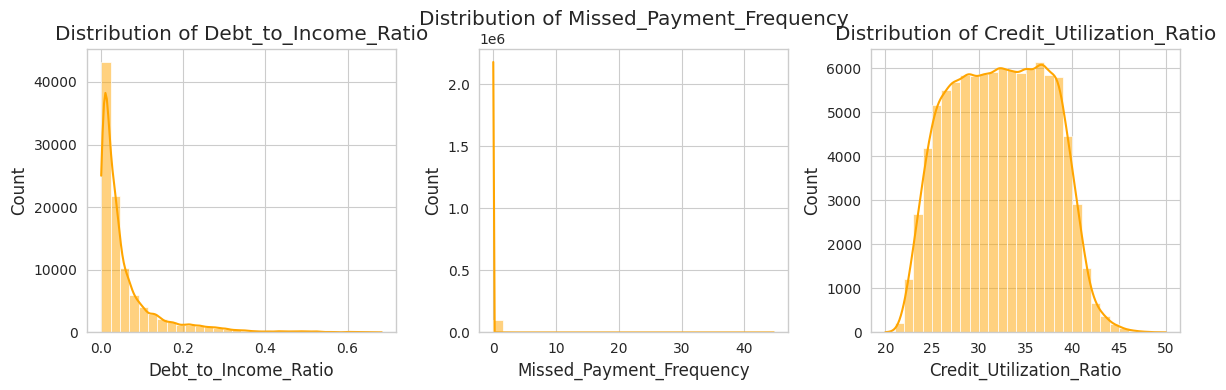

In [47]:
features = ['Debt_to_Income_Ratio', 'Missed_Payment_Frequency', 'Credit_Utilization_Ratio']

plt.figure(figsize=(12, 4))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='orange')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


**1. Distribution of Debt-to-Income Ratio (DTI)**
- **Right-skewed distribution:** The majority of individuals have a **low DTI** (close to 0), while a few have much higher values.
- **Most borrowers have a DTI below 0.1 (10%)**, indicating relatively low debt compared to income.
- **Some extreme values above 0.4 (~40%)** suggest high-risk individuals who dedicate a significant portion of their income to debt.

**2. Distribution of Missed Payment Frequency**
- **Highly skewed with a strong peak at zero:** The majority of customers have **not missed any payments**.
- **A very small proportion has a high number of missed payments (10 - 45+ times).**
- **Extreme values (above 10 missed payments)** indicate a few borrowers who are at serious risk of default.

**3. Distribution of Credit Utilization Ratio**
- **Appears roughly uniform between 25% and 45%, peaking around 35%**.
- **Minimum at 20% and maximum at 50%**, suggesting a possible **credit limit or capping effect**.
- **Relatively normal distribution** compared to the other features.

### Scatter Plots to Identify Risky Patterns
Objective: Detect patterns among high-risk individuals.

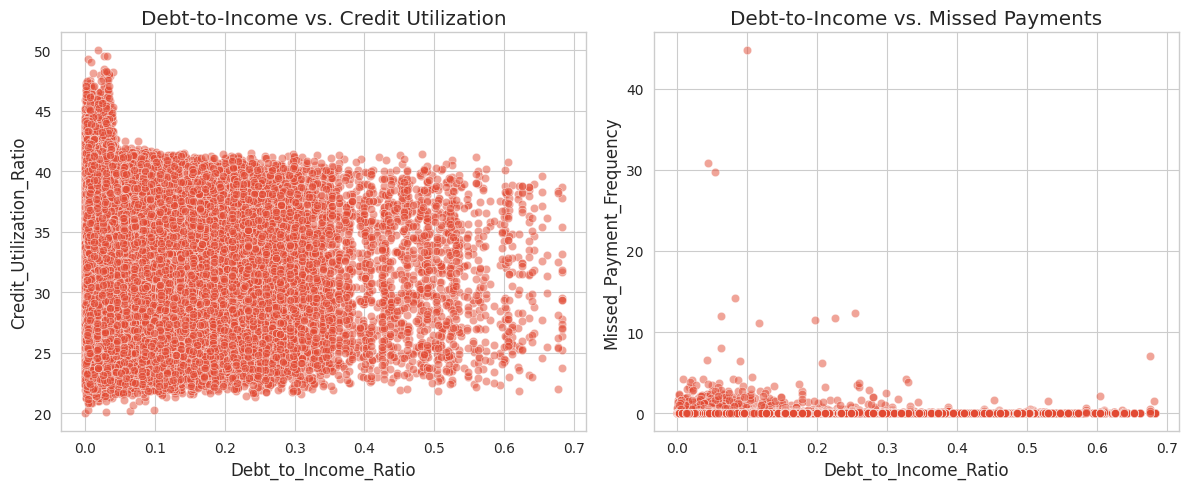

In [48]:
plt.figure(figsize=(12, 5))

# DTI vs Credit Utilization
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Debt_to_Income_Ratio'], y=df['Credit_Utilization_Ratio'], alpha=0.5)
plt.title("Debt-to-Income vs. Credit Utilization")

# DTI vs Missed Payments
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Debt_to_Income_Ratio'], y=df['Missed_Payment_Frequency'], alpha=0.5)
plt.title("Debt-to-Income vs. Missed Payments")

plt.tight_layout()
plt.show()

High Debt to Income ratio is linked to frequent missed payments, and its signals financial distress.
High Credit Utilization may predict repayment issues.

### **Distribution of Financial Indicators**
**Understanding Creditworthiness**

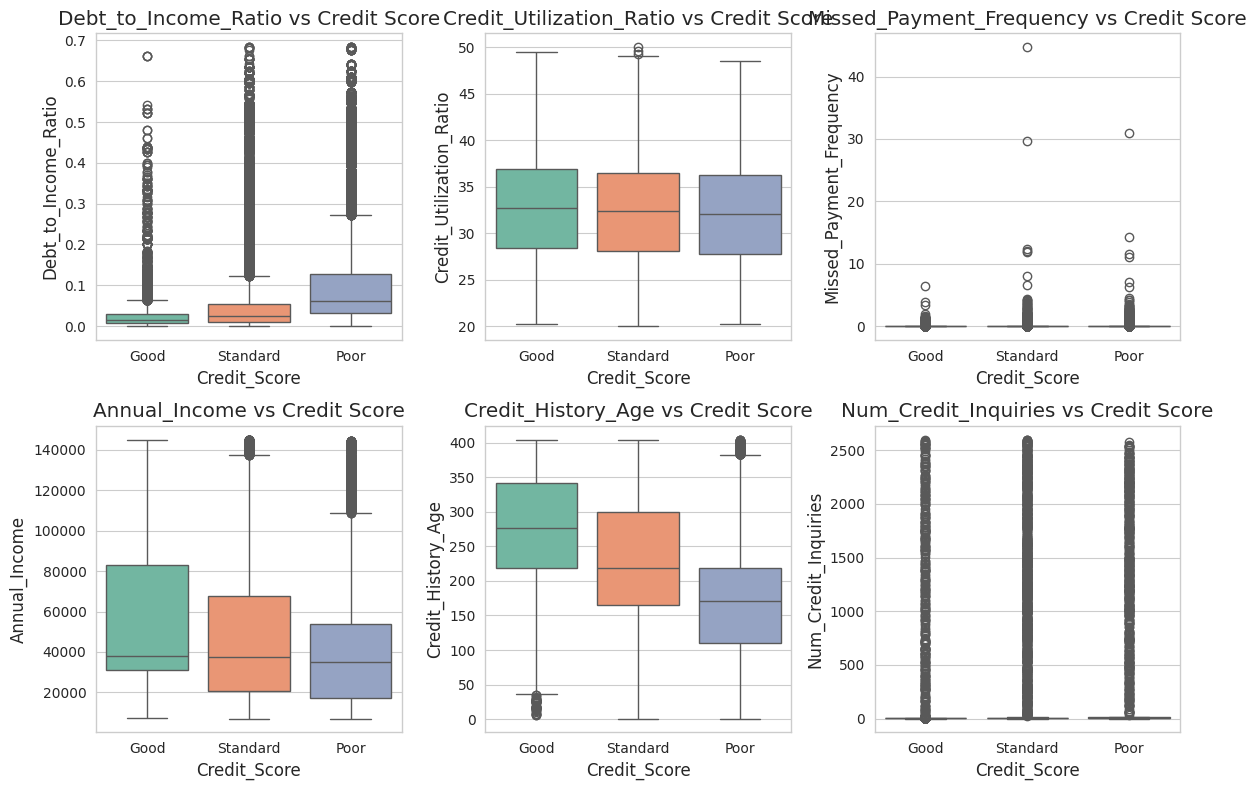

In [49]:
# Define relevant features
features = ['Debt_to_Income_Ratio', 'Credit_Utilization_Ratio', 'Missed_Payment_Frequency', 'Annual_Income', 'Credit_History_Age', 'Num_Credit_Inquiries']

plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df['Credit_Score'], y=df[col], palette="Set2")
    plt.title(f'{col} vs Credit Score')
plt.tight_layout()
plt.show()

**Debt-to-Income Ratio (DTI) vs Credit Score:**
Individuals with a "Good" credit score tend to have a lower DTI ratio compared to those with "Standard" or "Poor" credit scores.
This suggests that a lower DTI ratio is associated with a higher credit score, indicating that lenders view lower debt burdens as a positive factor in creditworthiness.

**Credit Utilization Ratio vs Credit Score:**
Individuals with a "Good" credit score tend to have a lower credit utilization ratio compared to those with "Standard" or "Poor" credit scores.
This implies that maintaining a lower credit utilization ratio, which measures the amount of available credit being used, is associated with a higher credit score.

**Missed Payment Frequency vs Credit Score:**
Individuals with a "Good" credit score tend to have a lower frequency of missed payments compared to those with "Standard" or "Poor" credit scores.
This suggests that a history of on-time payments is an important factor in determining credit scores, as missed payments can negatively impact an individual's creditworthiness.

### **Correlation Analysis of Financial Indicator for Credit Worthiness**

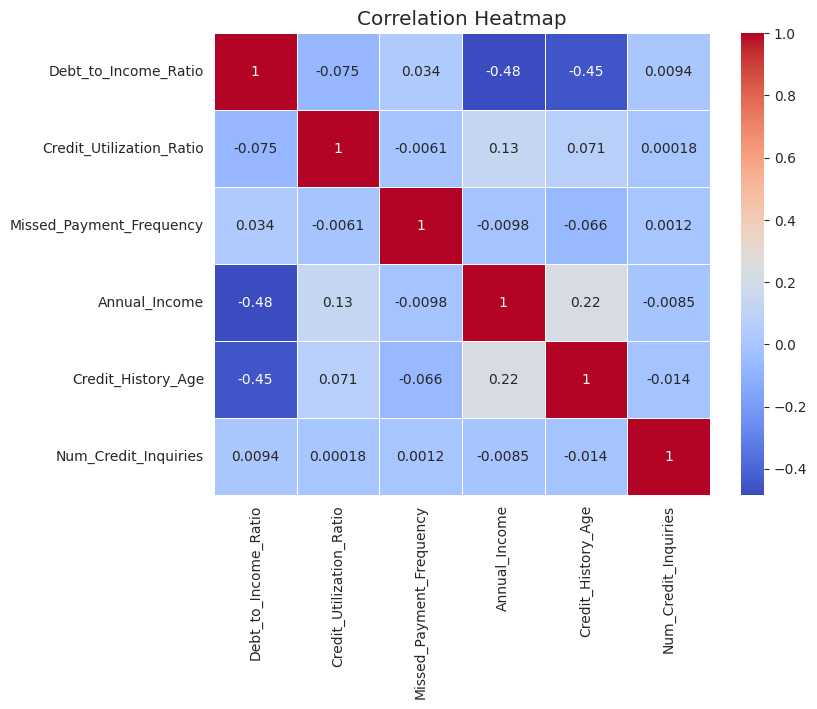

In [50]:
# Selecting only numerical columns
numerical_features = ['Debt_to_Income_Ratio', 'Credit_Utilization_Ratio', 'Missed_Payment_Frequency', 'Annual_Income', 'Credit_History_Age', 'Num_Credit_Inquiries']
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

1. **Strong Negative Correlation Between Debt-to-Income Ratio and Annual Income (-0.48)**: This suggests that higher income individuals tend to have lower debt-to-income ratios, which aligns with financial principles.
2. **Strong Negative Correlation Between Debt-to-Income Ratio and Credit History Age (-0.45)**: People with a longer credit history tend to have lower debt-to-income ratios.
3. **Positive Correlation Between Annual Income and Credit History Age (0.22)**: People with higher incomes tend to have longer credit histories, suggesting financial stability over time.
4. **Credit Utilization Ratio Has a Weak Negative Correlation with Missed Payment Frequency (-0.0061)**: No significant relationship between credit utilization and missed payments, meaning people who use a large portion of their credit may still make payments on time.
5. **Number of Credit Inquiries Has No Significant Correlation with Any Key Financial Variable**: The number of times a person applies for new credit does not strongly impact debt, credit utilization, or payment behavior.

### **Income vs Credit Utilization (Financial Stability)**

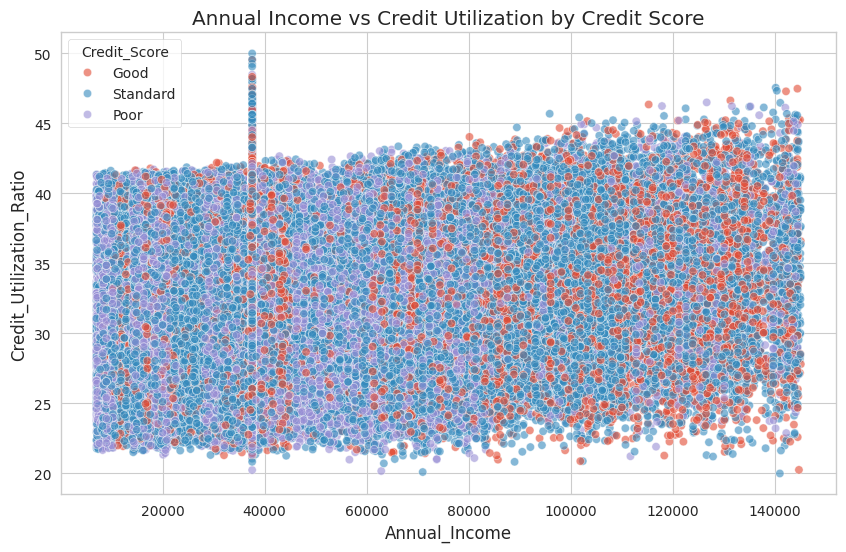

In [51]:
plt.figure(figsize = (10,6))
sns.scatterplot(x=df['Annual_Income'], y=df['Credit_Utilization_Ratio'], hue=df['Credit_Score'], alpha=0.6)
plt.title("Annual Income vs Credit Utilization by Credit Score")
plt.show()

**Credit Utilization Is Fairly Evenly Distributed Across All Income Levels**: The Credit Utilization Ratio appears to be spread consistently across different income levels, meaning higher income does not necessarily correlate with lower credit utilization. This suggests that individuals across all income levels use a similar portion of their credit.

**People with Higher Incomes Tend to Have a Mix of Credit Scores**: Even at higher income levels (above $100,000), we still see individuals with "Poor" credit scores. This suggests that income alone is not a strong predictor of creditworthiness—other factors like payment history, debt levels, and credit inquiries may play a bigger role.

**More Poor Credit Scores Are Clustered at Lower Income Levels**: There is a noticeable concentration of purple dots (Poor Credit Score) among individuals with lower incomes (below $50,000). This suggests that lower-income individuals may struggle more with maintaining a good credit score, possibly due to higher debt burdens, missed payments, or financial instability.

**Credit Utilization Ratio Generally Ranges Between 20% - 50%**: Most individuals maintain a credit utilization ratio between 20% and 50%, regardless of income level. This aligns with financial best practices, where maintaining a credit utilization ratio below 30% is often recommended for better credit scores.

# **Risk Segmentation using Clustering**
**Customer Segmentation Based on Financial Indicators**

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features
X = df[['Debt_to_Income_Ratio', 'Credit_Utilization_Ratio', 'Missed_Payment_Frequency', 'Annual_Income']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Risk_Cluster'] = kmeans.fit_predict(X_scaled)

In [53]:
df['Risk_Cluster'].unique()

array([1, 0, 2], dtype=int32)

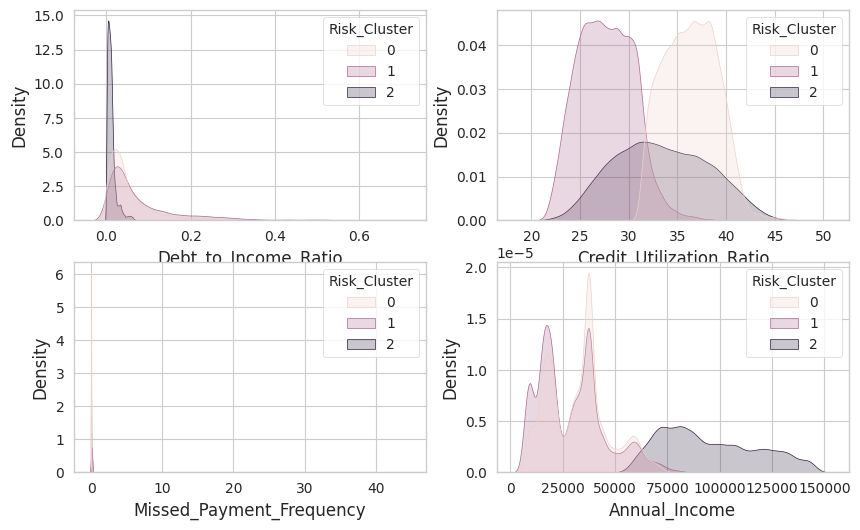

In [54]:
columns = ['Debt_to_Income_Ratio', 'Credit_Utilization_Ratio', 'Missed_Payment_Frequency', 'Annual_Income']
fig, ax = plt.subplots(2, 2, figsize=(10,6))
for name, ax in zip(columns, ax.ravel()):
    sns.kdeplot(data=df, hue='Risk_Cluster', x=name, shade=True, ax=ax)
plt.show()

In [55]:
# Categorize Risk Cluster
risk_mapping = {0: "Safe", 1: "Moderate Risk", 2: "High Risk"}

# Apply the mapping
df["Risk_Cluster"] = df["Risk_Cluster"].map(risk_mapping)

# Check the unique category
df["Risk_Cluster"].unique()

array(['Moderate Risk', 'Safe', 'High Risk'], dtype=object)

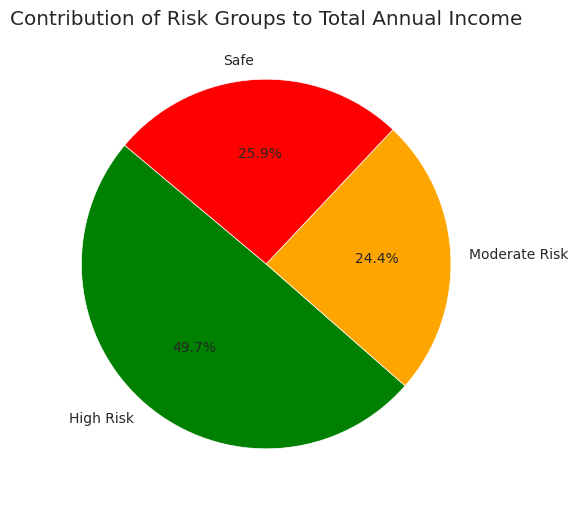

In [56]:
# Aggregate total annual income per risk category
risk_income = df.groupby("Risk_Cluster")["Annual_Income"].sum()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(risk_income, labels=risk_income.index, autopct='%1.1f%%', startangle=140, colors=['green', 'orange', 'red'])
plt.title("Contribution of Risk Groups to Total Annual Income")
plt.show()

High Risk Contribution: The High Risk group contributes the largest portion, accounting for 49.7% of the total annual income.

Moderate Risk Contribution: The Moderate Risk group contributes the second-largest portion, accounting for 24.4% of the total annual income.

Safe Contribution: The Safe group contributes the smallest portion, accounting for 25.9% of the total annual income.

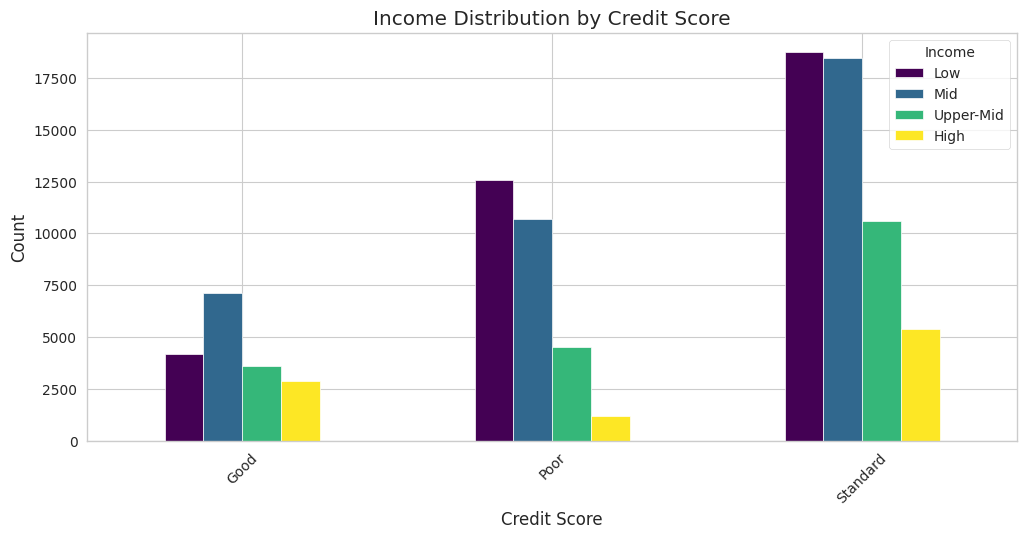

In [57]:
# Create a custom chart to visualize the income distribution by credit score
fig, ax = plt.subplots(figsize=(12, 6))

# Group the data by credit score and income
grouped = df.groupby(['Credit_Score', 'Income_Bracket'])['Annual_Income'].count().unstack(fill_value=0)

# Plot the income distribution for each credit score category
grouped.plot(kind='bar', ax=ax, cmap='viridis')

# Set the chart title and axis labels
ax.set_title('Income Distribution by Credit Score')
ax.set_xlabel('Credit Score')
ax.set_ylabel('Count')

# Add a legend
ax.legend(title='Income')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Display the chart
plt.show()


Standard Credit Score Group Dominates

The largest number of individuals fall into the Standard credit score category across all income levels.
Within this group, Low and Mid-income earners are the majority, while Upper-Mid and High-income earners are fewer.
This suggests that creditworthiness is not necessarily correlated with high income, as many lower-income individuals still maintain a Standard credit score.
Poor Credit Score is Predominantly Low & Mid-Income Individuals

The Poor credit category has a high concentration of Low and Mid-income earners, with a significantly smaller portion of Upper-Mid and High-income individuals.
This indicates that individuals with lower income levels are more prone to poor credit ratings, likely due to higher financial constraints, lower credit repayment capacity, or higher debt-to-income ratios.
Good Credit Score is Balanced but Skews Toward Mid-Income Earners

Among those with a Good credit score, Mid-income earners form the largest group, followed by Low, Upper-Mid, and High-income earners.
This suggests that having a good credit score is achievable even at moderate income levels, likely due to responsible financial management, timely payments, and controlled debt levels.

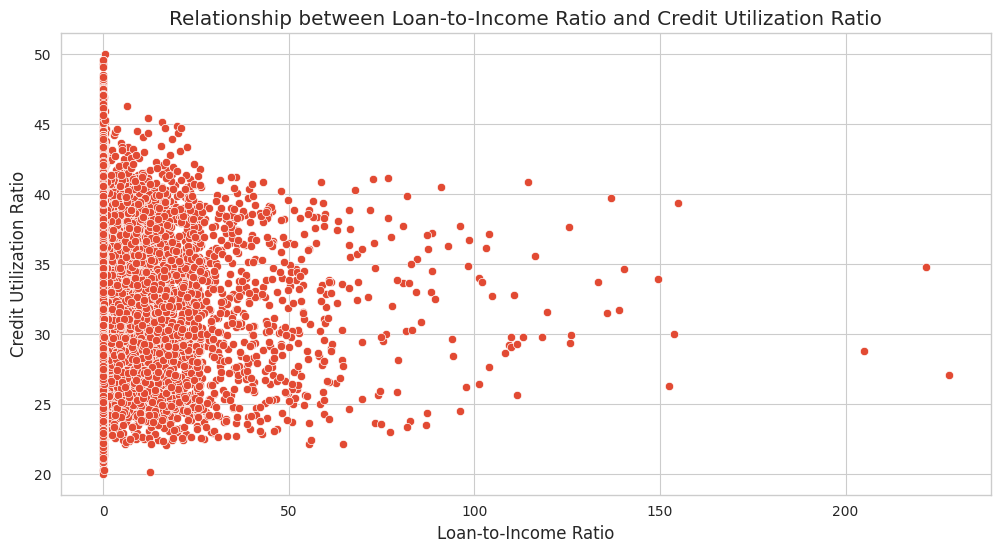

In [58]:
# Visualize the relationship between Loan-to-Income Ratio and Credit Utilization Ratio
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='Loan-to-Income Ratio', y='Credit_Utilization_Ratio', data=df, ax=ax)
ax.set_title('Relationship between Loan-to-Income Ratio and Credit Utilization Ratio')
ax.set_xlabel('Loan-to-Income Ratio')
ax.set_ylabel('Credit Utilization Ratio')
plt.show()

**High Density at Low Loan-to-Income Ratios:**

Most individuals have a low loan-to-income ratio (between 0 and 50), meaning they do not carry excessive loan burdens relative to their income.
However, within this range, credit utilization ratios vary widely, from around 20% to above 40%, indicating different levels of reliance on credit. Many individuals maintain a manageable loan burden, but their credit usage habits differ significantly. Increasing Loan-to-Income Ratios Lead to Greater Variability in Credit Utilization

As the loan-to-income ratio increases beyond 50, the spread in credit utilization ratios becomes more noticeable, with some individuals exceeding 40%. It suggest High loan burdens often correlate with higher credit usage, suggesting financial strain. Extremely High Loan-to-Income Ratios (>100) Are Rare but Risky

Few individuals have a loan-to-income ratio exceeding 100, but those who do generally have higher credit utilization ratios, implying significant financial risk. These individuals are high-risk borrowers, potentially struggling to manage both loans and credit card debt.

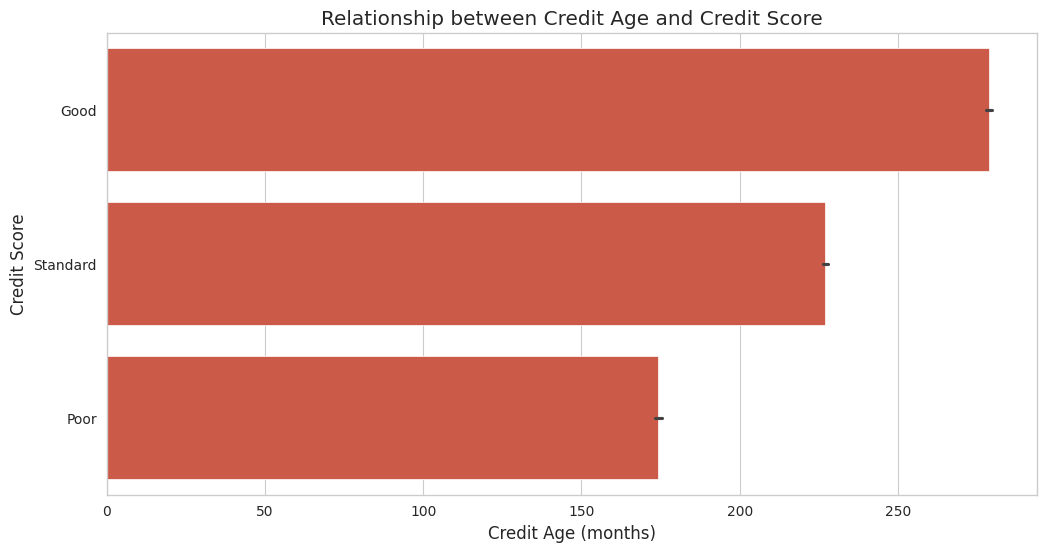

In [59]:
# Visualize the relationship between Credit Age and Credit Score
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Credit_History_Age', y='Credit_Score', data=df, ax=ax)
ax.set_title('Relationship between Credit Age and Credit Score')
ax.set_xlabel('Credit Age (months)')
ax.set_ylabel('Credit Score')
plt.show()

**Positive Correlation Between Credit Age and Credit Score**

Individuals with a "Good" credit score have the highest credit age, followed by those in the "Standard" category.
Those with a "Poor" credit score have significantly lower credit age, suggesting a strong relationship between longer credit history and better credit scores.

**Credit Age Variability is Low for Good Credit Scores**

The error bar for "Good" credit scores is very small, indicating that most individuals in this category have a consistently long credit age.
In contrast, the "Poor" category has a slightly wider error bar, suggesting more variability in credit age among individuals with lower credit scores.

**The Standard Credit Score Category Represents a Transition Zone**

The "Standard" credit score group falls between the Poor and Good categories in terms of credit age, suggesting that individuals in this group could improve their credit score over time by maintaining responsible credit behavior.

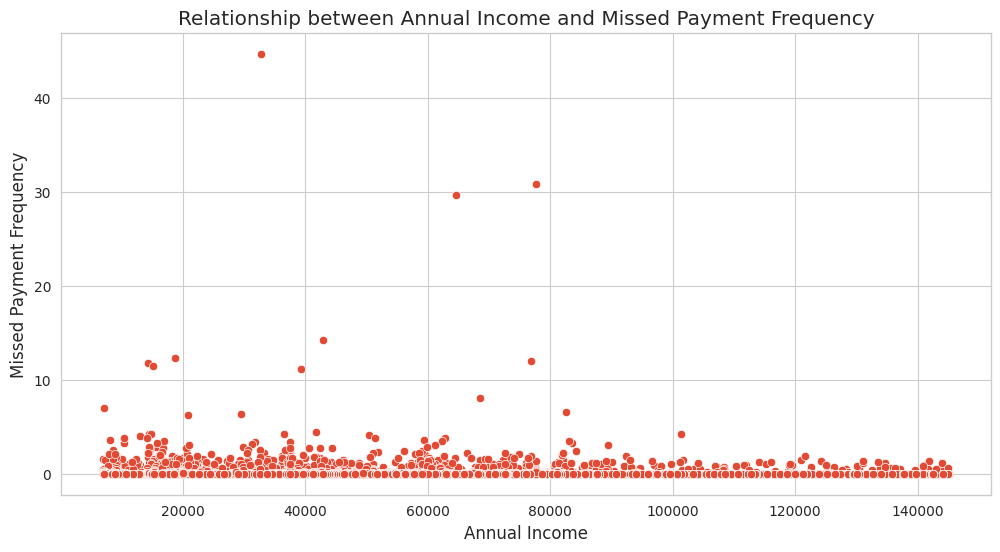

In [60]:
# Visualize the relationship between Annual Income and Missed Payment Frequency
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='Annual_Income', y='Missed_Payment_Frequency', data=df, ax=ax)
ax.set_title('Relationship between Annual Income and Missed Payment Frequency')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Missed Payment Frequency')
plt.show()

**Majority of Missed Payments Occur at Lower Income Levels**

The density of missed payments is significantly higher among individuals with lower annual incomes (below `~$50,000`).
A few extreme outliers exist where some low-income earners have a very high frequency of missed payments (above 30 times).

**Higher Income Individuals Tend to Have Fewer Missed Payments**

As annual income increases beyond `~$60,000`, the frequency of missed payments generally decreases.
Individuals earning above `$100,000` rarely miss payments, suggesting financial stability improves with higher earnings.

**A Few High-Income Outliers Still Miss Payments Frequently**

There are a few outliers in the `$60,000–$90,000` income range with high missed payment frequency (`20–40` times).
This suggests that factors beyond income—such as financial mismanagement, high debt, or lifestyle choices—contribute to missed payments.

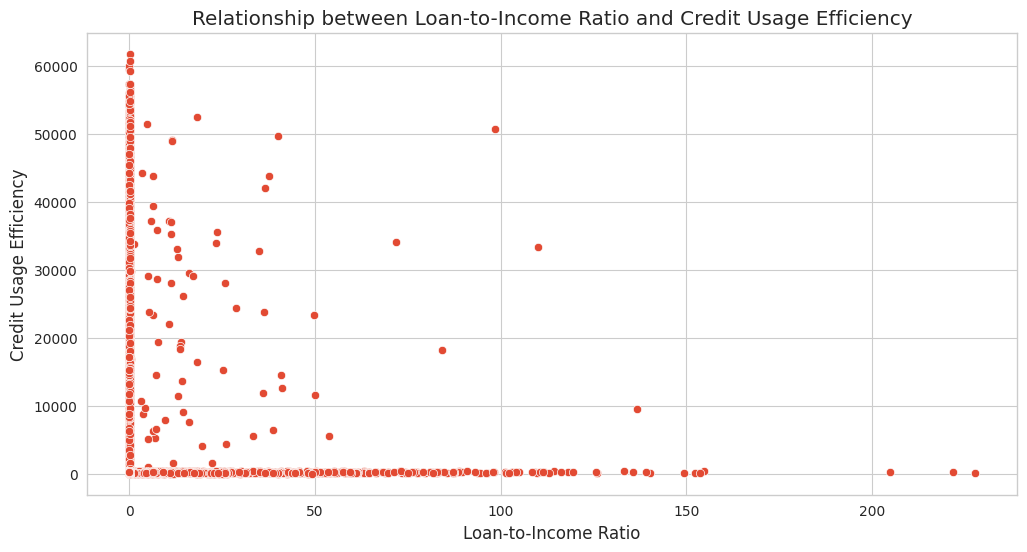

In [61]:
# Visualize the relationship between Loan-to-Income Ratio and Credit Usage Efficiency
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='Loan-to-Income Ratio', y='Credit Usage Efficiency', data=df, ax=ax)
ax.set_title('Relationship between Loan-to-Income Ratio and Credit Usage Efficiency')
ax.set_xlabel('Loan-to-Income Ratio')
ax.set_ylabel('Credit Usage Efficiency')
plt.show()

 **Most Individuals Have a Low Loan-to-Income Ratio**

A high density of data points is clustered around a loan-to-income ratio of 0–10, meaning most individuals have taken loans that are small relative to their income.
This suggests a low credit dependency for the majority of individuals.

**Credit Usage Efficiency Varies Widely at Low Loan-to-Income Ratios**

Among individuals with a low loan-to-income ratio (0–10), credit usage efficiency varies significantly, with some reaching values above 60,000 while others remain near zero.
This suggests that even with low debt levels, credit utilization behaviors differ greatly.

**Higher Loan-to-Income Ratios Correspond to Lower Credit Usage Efficiency**

As the loan-to-income ratio increases (beyond 50), credit usage efficiency tends to remain low. This indicates that individuals who take on excessive loans relative to their income are less efficient in managing their credit.

**Extreme Loan-to-Income Ratios Exist But Are Rare**

A few outliers have extremely high loan-to-income ratios (above 100 and even 200), but their credit usage efficiency is very low. This suggests these individuals may be overleveraged and struggling with credit management.

# Data Preprocessing for Model Preparation

In [62]:
# Replace 0 age with null
df['Age'] = df['Age'].replace(0, pd.NA)

# Handle null age with mean age
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

# Replace negative Missed_Payment_Frequency with null
df = df.loc[df['Missed_Payment_Frequency'] >= 0]
df['Missed_Payment_Frequency'] = df['Missed_Payment_Frequency'].where(df['Missed_Payment_Frequency'] >= 0, pd.NA)

# Handle null Missed_Payment_Frequency with median
median_missed_payment = df['Missed_Payment_Frequency'].median()
df['Missed_Payment_Frequency'] = df['Missed_Payment_Frequency'].fillna(median_missed_payment)


# Capping extreme values at the 99th percentile
df['Debt_to_Income_Ratio'] = np.where(df['Debt_to_Income_Ratio'] > df['Debt_to_Income_Ratio'].quantile(0.99), df['Debt_to_Income_Ratio'].quantile(0.99), df['Debt_to_Income_Ratio'])
df['Missed_Payment_Frequency'] = np.where(df['Missed_Payment_Frequency'] > df['Missed_Payment_Frequency'].quantile(0.99), df['Missed_Payment_Frequency'].quantile(0.99), df['Missed_Payment_Frequency'])
df['Credit_Utilization_Ratio'] = np.where(df['Credit_Utilization_Ratio'] > df['Credit_Utilization_Ratio'].quantile(0.99), df['Credit_Utilization_Ratio'].quantile(0.99), df['Credit_Utilization_Ratio'])

# view few rows
df.head()

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Income_Bracket,Debt_to_Income_Ratio,Missed_Payment_Frequency,Loan-to-Income Ratio,Credit Usage Efficiency,Risk_Cluster
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,80.415295,High_spent_Small_value_payments,312.494089,Good,Low,0.042376,0.002201,0.027167,107.290478,Moderate Risk
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,Scientist,19114.12,3093.745000,3,4,...,118.280222,Low_spent_Large_value_payments,284.629162,Good,Low,0.042376,0.000000,0.016024,127.779840,Safe
2,0x1604,CUS_0xd40,March,Aaron Maashoh,32.0,Scientist,19114.12,3093.745000,3,4,...,81.699521,Low_spent_Medium_value_payments,331.209863,Good,Low,0.042376,0.002185,0.016024,114.437408,Moderate Risk
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,Scientist,19114.12,3093.745000,3,4,...,199.458074,Low_spent_Small_value_payments,223.451310,Good,Low,0.042376,0.001244,0.016024,125.511447,Moderate Risk
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,Scientist,19114.12,1824.843333,3,4,...,41.420153,High_spent_Medium_value_payments,341.489231,Good,Low,0.042376,0.000000,0.027167,99.189388,Moderate Risk


In [63]:
df.shape

(99378, 33)

# Convert Categorical Features to Numerical
- Using Label Encoding

In [64]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [65]:
df.head()

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Income_Bracket,Debt_to_Income_Ratio,Missed_Payment_Frequency,Loan-to-Income Ratio,Credit Usage Efficiency,Risk_Cluster
0,16315,12320,3,21,23.0,12,19114.12,1824.843333,3,4,...,80.415295,2,312.494089,0,1,0.042376,0.002201,0.027167,107.290478,1
1,16325,12320,2,21,23.0,12,19114.12,3093.745000,3,4,...,118.280222,3,284.629162,0,1,0.042376,0.000000,0.016024,127.779840,2
2,16336,12320,6,21,32.0,12,19114.12,3093.745000,3,4,...,81.699521,4,331.209863,0,1,0.042376,0.002185,0.016024,114.437408,1
3,16349,12320,0,21,23.0,12,19114.12,3093.745000,3,4,...,199.458074,5,223.451310,0,1,0.042376,0.001244,0.016024,125.511447,1
4,16360,12320,7,21,23.0,12,19114.12,1824.843333,3,4,...,41.420153,1,341.489231,0,1,0.042376,0.000000,0.027167,99.189388,1


## Feature Importance and Selection
Extracting important features using Random Forest

In [66]:
# drop the ID, and Customer_ID as it is just a unique identifier
df.drop(['ID', 'Customer_ID'], axis=1, inplace=True)

In [67]:
# Select the target variable y
y = df['Credit_Score']

# Drop the target variable and create the independent variables
X = df.drop('Credit_Score', axis=1)

In [68]:
print(y.head())
print(X.head())

0    0
1    0
2    0
3    0
4    0
Name: Credit_Score, dtype: int64
   Month  Name   Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      3    21  23.0          12       19114.12            1824.843333   
1      2    21  23.0          12       19114.12            3093.745000   
2      6    21  32.0          12       19114.12            3093.745000   
3      0    21  23.0          12       19114.12            3093.745000   
4      7    21  23.0          12       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  ...  \
0                  3                4              3            4  ...   
1                  3                4              3            4  ...   
2                  3                4              3            4  ...   
3                  3                4              3            4  ...   
4                  3                4              3            4  ...   

   Total_EMI_per_month  Amount_invested_mo

In [69]:
# value count of the target y
y.value_counts()

,count
Credit_Score,
2,52935
1,28917
0,17526


In [70]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
selected_features = feature_importances[:10].index.tolist()  # Selecting top 10 features
print(selected_features)

['Outstanding_Debt', 'Interest_Rate', 'Credit_Mix', 'Delay_from_due_date', 'Debt_to_Income_Ratio', 'Changed_Credit_Limit', 'Credit Usage Efficiency', 'Credit_History_Age', 'Missed_Payment_Frequency', 'Num_Credit_Inquiries']


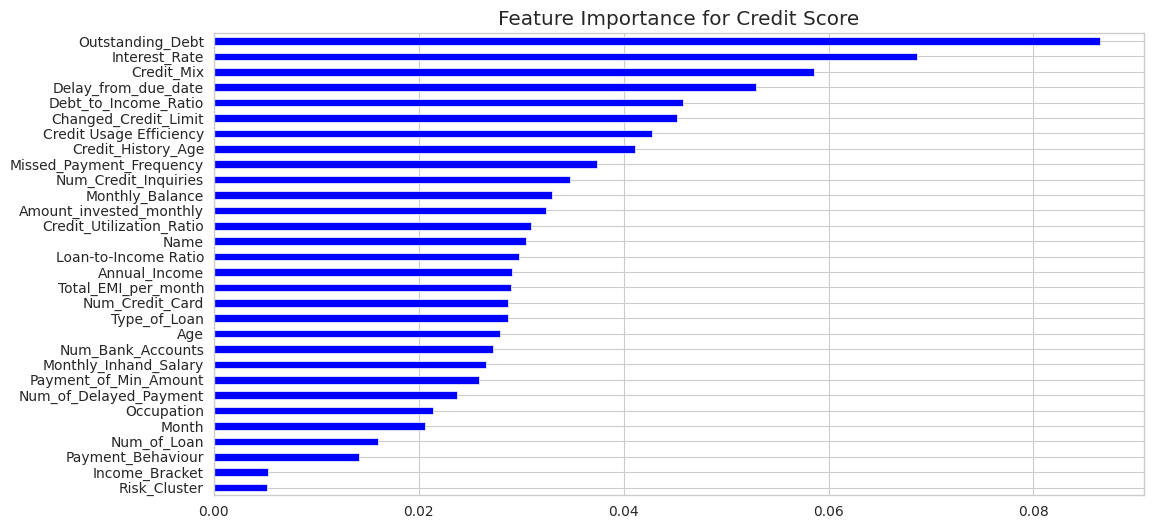

In [71]:
# Plot feature importance
plt.figure(figsize=(12,6))
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='blue')
plt.title("Feature Importance for Credit Score")
plt.show()

**Top Contributing Factors:**

Outstanding Debt: The most important factor in determining credit score, indicating that individuals with high outstanding debt may have lower credit scores.
Interest Rate: A crucial factor, likely affecting the cost of borrowing and overall financial stability.
Credit Mix: A strong indicator of creditworthiness, suggesting that diverse credit accounts (loans, credit cards, mortgages) improve the credit score.
Delay from Due Date: Late payments negatively impact the score, reinforcing the importance of timely payments.
Changed Credit Limit: Significant changes in credit limits can affect the credit utilization ratio, impacting credit scores.
Debt-to-Income Ratio: A key factor in assessing an individual's ability to manage debt relative to income.

**Moderately Important Features:**

Credit Usage Efficiency: Indicates how effectively an individual uses their available credit.
Credit History Age: Older credit histories generally contribute to higher scores.
Missed Payment Frequency: Higher missed payments lead to lower credit scores.
Monthly Balance & Investment: Financial stability indicators, affecting creditworthiness.

**Less Significant Features:**

Type of Loan, Num of Loans, Num of Bank Accounts: These have a lower impact but still contribute to risk assessment.
Payment Behavior, Risk Cluster, Income Bracket: These factors have the least importance, suggesting they may have minor effects on credit scoring models.

## Train-Test-Split
Split the dataset into training and testing sets. We will allocate a certain percentage of 80-20 for training and testing, respectively. This will be done using the train_test_split function from scikit-learn.


In [72]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], y, test_size=0.2, random_state=42)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


        Outstanding_Debt  Interest_Rate  Credit_Mix  Delay_from_due_date  \
74598            636.21             20           3                   24   
45263           4100.98             19           0                   16   

       Debt_to_Income_Ratio  Changed_Credit_Limit  Credit Usage Efficiency  \
74598              0.026168                 19.83               198.419996   
45263              0.060192                 26.04               247.442422   

       Credit_History_Age  Missed_Payment_Frequency  Num_Credit_Inquiries  
74598               122.0                  0.010246                     4  
45263                53.0                  0.026730                    12  

        Outstanding_Debt  Interest_Rate  Credit_Mix  Delay_from_due_date  \
85098            782.93              6           3                   12   
7957            3119.60             15           0                   50   

       Debt_to_Income_Ratio  Changed_Credit_Limit  Credit Usage Efficiency  \
850

In [73]:
# Scaling numerical features using Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection & Training
Algorithms to Consider:
- Logistic Regression (baseline model)
- Random Forest (handles non-linearity well)
- XGBoost (handles feature importance well)

In [74]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate models
evaluation_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    evaluation_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC-AUC': roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    }

In [75]:
# Convert results to DataFrame
results_df = pd.DataFrame(evaluation_results).T
print(results_df)

# Display Classification Report
for name, model in models.items():
    print(f'Classification Report for {name}:')
    print(classification_report(y_test, model.predict(X_test)))
    print('\n' + '='*50 + '\n')

# Confusion Matrix Visualization
for name, model in models.items():
    cm = confusion_matrix(y_test, model.predict(X_test))
    fig = px.imshow(cm, text_auto=True, labels=dict(x='Predicted', y='Actual'), title=f'Confusion Matrix: {name}')
    fig.show()

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.605051   0.602551  0.605051  0.587282  0.763835
Random Forest        0.768917   0.768854  0.768917  0.768875  0.901864
XGBoost              0.734051   0.734366  0.734051  0.733948  0.874457
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.52      0.32      0.39      3509
           1       0.65      0.44      0.52      5862
           2       0.61      0.79      0.69     10505

    accuracy                           0.61     19876
   macro avg       0.59      0.52      0.53     19876
weighted avg       0.60      0.61      0.59     19876



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      3509
           1       0.78      0.77      0.77      5862
           2       0.79      0.80      0.79     10505

    accuracy               

## Hyperparameter Tuning and  MLflow Tracking and Logging
- GridSearchCV for optimal Random Forest model

- Logs & Monitors with MLflow (Tracks metrics like Accuracy, Precision, Recall, ROC-AUC)

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter Tuning (Optimized)
param_grid = {
    'n_estimators': [100, 200],  # Reducing search space for faster tuning
    'max_depth': [None, 10],
    'min_samples_split': [5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1  # Parallel processing
)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# MLflow Logging (Optimized)
mlflow.set_experiment('Credit Score Classification')

with mlflow.start_run():
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric('Best Accuracy', grid_search.best_score_)
    mlflow.sklearn.log_model(grid_search.best_estimator_, 'best_model')  # Logging the best model

mlflow.end_run()  # Ensure the run is properly closed


## Saving Model

In [ ]:
# Save Model
joblib.dump(grid_search.best_estimator_, 'credit_model.pkl')

## FastAPI for Model Serving
Deploys Model using FastAPI (Runs a prediction API)

In [ ]:
# FastAPI for Model Serving
app = FastAPI()
model = joblib.load('credit_model.pkl')

@app.post('/predict/')
def predict(features: dict):
    data = np.array([features[key] for key in features]).reshape(1, -1)
    prediction = model.predict(data)
    return {'prediction': prediction.tolist()}

#**Business Recommendations**

### **1. Data Quality and Integrity Improvements**
- **Address Data Anomalies:** Implement data validation rules to detect and correct negative values in critical fields like Age, Num_Bank_Accounts, and Num_of_Loan.
- **Handle Outliers:** Apply statistical techniques such as winsorization or transformations to mitigate the impact of extreme values in Annual_Income and Monthly_Balance.
- **Improve Data Categorization:** Ensure loan types are correctly categorized to provide better insights into customer preferences.

### **2. Targeted Financial Product Offerings**
- **Young Adults (20-30 years old):** Develop tailored financial literacy programs and beginner credit-building products.
- **Mid-career Professionals (30-50 years old):** Offer investment advisory services, mortgage options, and structured debt consolidation plans.
- **High Earners (>$100,000 annual income):** Introduce premium banking products such as wealth management and exclusive investment opportunities.

### **3. Loan and Credit Management Strategies**
- **Risk-Based Loan Approvals:** Implement a tiered risk model for loan approvals based on debt-to-income ratio (DTI), missed payment history, and credit utilization.
- **Structured Loan Repayment Plans:** Design flexible EMI structures for low-income groups earning between $20,000-$40,000 annually to ensure affordability.
- **Debt Consolidation Programs:** Target individuals with multiple high-interest loans for refinancing options at lower rates.

### **4. Credit Score Improvement Programs**
- **Low-Income Borrowers:** Provide access to secured credit cards, low-limit credit lines, and personalized credit coaching.
- **Moderate-Income Borrowers:** Encourage controlled credit utilization through financial planning tools and automated repayment reminders.
- **High-Risk Borrowers:** Implement intensive financial counseling programs and introduce behavioral incentives for timely payments.

### **5. Credit Utilization and Debt Management Solutions**
- **Optimize Credit Utilization:** Encourage borrowers to maintain a utilization ratio below 30% to improve credit scores.
- **Monitor High-Debt Customers:** Identify and assist customers with utilization above 50% to prevent defaults.
- **Custom Credit Limit Adjustments:** Adjust credit limits dynamically based on spending and repayment behavior to reduce risk.

### **6. Default Risk Mitigation Strategies**
- **Early Warning Systems:** Develop AI-driven models to detect high-risk customers based on missed payment frequency and DTI.
- **Proactive Payment Assistance:** Offer grace periods and financial hardship programs for customers with recurring late payments.
- **Automated Repayment Solutions:** Implement auto-debit features and AI-driven reminders to minimize late payments.

### **7. Income-Based Financial Product Segmentation**
- **Low-Income Segment `(<$40,000 annual income)`:** Focus on microloans, credit-building accounts, and budgeting tools.
- **Middle-Income Segment `($40,000 - $80,000 annual income)`:** Offer diversified investment portfolios, moderate-risk credit options, and mortgage plans.
- **High-Income Segment `(>$80,000 annual income)`:** Provide luxury banking, high-yield investments, and premium financial advisory services.

### **8. Enhancing Financial Literacy and Awareness**
- **Educational Workshops:** Conduct monthly financial literacy sessions targeting different demographics.
- **AI-Powered Financial Advisors:** Deploy chatbots to provide real-time financial advice and credit-building guidance.
- **Personalized Budgeting Tools:** Offer AI-driven budgeting apps that provide insights into spending habits and debt management.

### **9. Improving Loan Approval Process**
- **Incorporate Creditworthiness Metrics:** Use alternative data points like employment history, transaction behavior, and spending patterns.
- **Reduce Processing Time:** Automate credit checks and risk assessments to approve low-risk loans faster.
- **Enhance Transparency:** Provide applicants with clear explanations for loan approvals or rejections to build trust.

### **10. Fraud Detection and Prevention**
- **Monitor Unusual Loan Applications:** Investigate outliers with excessively high loan counts to prevent fraudulent activities.
- **Strengthen Identity Verification:** Implement multi-factor authentication for loan applications and large transactions.
- **AI-Powered Fraud Detection:** Use machine learning to flag suspicious credit inquiries and irregular borrowing patterns.

### **Conclusion**
By implementing these targeted recommendations, FinDataTech can enhance customer engagement, improve risk management, and drive sustainable growth. A strategic focus on data integrity, tailored financial products, and proactive risk mitigation will ensure better financial stability for both customers and institutions.



## Limitations of the Current Data
While we aim to analyze loan repayment behavior and borrower segmentation, our dataset has some key limitations that restrict deeper insights:

### **1. Data Quality and Availability**  
- **Incomplete or Inconsistent Data:** Credit data might have missing or incorrect values, especially in transaction history or income reports.
- **Lack of Alternative Data:** Many individuals, especially those without a credit history (e.g., young adults or the unbanked), may not have enough financial records for traditional credit scoring models.  
- **Data Bias:** Historical data may reflect systemic biases in lending practices, leading to unfair model predictions.
-  **Missing Loan Amount and Frequency**: We lack data on loan amounts and how often loans are taken, making it difficult to assess debt burden or calculate the Debt-to-Income (DTI) ratio, which is a key indicator of financial health.
-  **No Loan Repayment Status**: Without details on whether borrowers repay on time, default, or miss payments, we cannot directly analyze repayment behavior or segment borrowers based on risk.

### **2. Model Performance and Explainability**  
- **Trade-off Between Accuracy and Interpretability:** While complex models (e.g., neural networks, XGBoost) improve predictive power, they are less interpretable than simpler models (e.g., logistic regression, decision trees).  
- **Generalization Issues:** Models trained on one demographic or region may not generalize well to others due to economic and cultural differences.  

### **3. Ethical and Regulatory Challenges**  
- **Bias in Credit Decisions:** If the model is trained on biased historical data, it could reinforce discriminatory lending practices.  
- **Regulatory Compliance:** Many financial regulations require transparency in credit decisions, but black-box models may not meet these requirements.  
- **Fairness vs. Profitability Conflict:** Ensuring fairness may sometimes reduce model profitability, as riskier borrowers might be approved based on non-traditional features.  

### **4. Real-time Scoring Limitations**  
- **Delayed Data Processing:** Many banking systems update data in batches, making real-time creditworthiness assessment challenging.  
- **Scalability Issues:** Running complex ML models in real-time requires significant computing resources, especially for large-scale financial institutions.  

### **5. Handling Imbalanced Data**  
- **Risk of Overfitting Minority Classes:** Techniques like SMOTE may create synthetic samples that do not fully represent real-world borrower behavior.  
- **Undersampling Could Lose Key Information:** Removing majority class data (e.g., those with good credit scores) could reduce model effectiveness.  

### **6. Security and Privacy Concerns**  
- **Data Protection Risks:** Storing and processing sensitive financial data increases the risk of data breaches.  
- **User Privacy Issues:** Incorporating alternative data sources (e.g., social media, mobile usage) raises ethical concerns about consent and privacy.  